## Credit Card Fraud Detection
Intro to topic:
Predict which transactions are normal vs. fraud. Datasets can many columns (from 30 to 500+) so we can do feature selection. Fraudulent 
transactions account for less than 5% so we datasets are unbalanced. Moreover, we can visualize normal vs. fraud clusters with t-sne/SVD/PCA. 

## To Do
* make sure to include all references in code

## Resources
<ol>
    <li>GitHub repo that contains data can be found here: <a href="https://github.com/liamkouch/329e_project">link</a></li>
    <li>kaggle <a href="https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook">notebook</a> that analyses and makes a model for a dataset</li>
    <li>feature engineering kaggle <a href="https://www.kaggle.com/learn/feature-engineering">lesson</a> which could be useful for feature selection</li>
    <li>fraud detection online <a href="https://fraud-detection-handbook.github.io/fraud-detection-handbook/">book</a> which contains useful background/info on fraud detection</li>
    <li>GitHub <a href="https://github.com/amazon-science/fraud-dataset-benchmark?tab=readme-ov-file#data-sources">repo</a> with financial fraud datasets</li>
    <li>https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/2013_Book_AppliedPredictiveModeling.pdf</li>
</ol>

## Steps for ml pipeline

* Preprocessing
  * Check for null values
  * Normalize data
* Exploratory data analysis
  * Visualize clusters with T-SNE
  * Visualize distribution of features
* Feature selection 
  * By mi-scores. We take the top n features based on this score where n is in [3, 5, 10, 15] 
* Imbalance method 
  * Sampling methods 
    * Undersampling 
      * RandomUnderSampler
    * Oversampling
      * RandomOverSampler
      * SMOTE
      * BorderlineSMOTE
      * SVMSMOTE
* Models
  * Logistic Regression
  * Random Forest
* Evaluation 
  * Average precision which is an approximation to the area under the curve of the PR curve
  * Learning curves to check for overfitting
  * K-fold cross validation

$$ \text{Preprocessing} \rightarrow \text{Exploratory data analysis} \rightarrow \text{Feature selection} \times \text{Imbalance method} \times \text{Model} \rightarrow \text{Evaluation}$$

If we have n types of feature selections, m types of imbalance methods, and p types of models, then altogether there are $n \times m \times p$ results to compare.
## 3. Define a Project
1. Describe well the new model that you are using.

We are implementing and evaluating several different classification models to detect credit card transactions that are fraudulent. Since the dataset is imbalanced we attempted to use resampling methods such as undersampling and SMOTE in our pipeline; however, based upon our results we found that resampling methods only marginally improved performance if at all. We use Mutual Information (MI) scores for feature selection. Altogether, we use a form of feature selection, a resampling method, and a classification model (logistic regression, random forest, etc.). We then evaluate performance of models with precision-recall curves as a measure of how well the model detects frauds, and we use learning curves to diagnose overfitting. We are trying to see the effect on sampling on the performance of the models. We hope to see boosted performance compared to no sampling.

2. What is your data set about?

The dataset we are using contains credit card transaction records, where each row represents a transaction and is classified as either normal or fraudulent. The dataset's 28 features have been hidden and are instead labeled as Variable 1 through Variable 28, making them abstract to us but still valuable for modeling. 2 features Time and Amount are not hidden. The dataset is highly imbalanced, with only 0.17% of the data labeled as fraud.

3. Clean up your data and reduce it if your dataset is very large.

To process the data, we checked for null values, which were not present in the dataset. Additionally, we used boxplots and scatterplots of the means and standard deviations of features to identify outliers and determine which features had higher variance. The different features were then normalized. The initial dataset is large and thus time-expensive to train and conduct analysis. Consequently, we have taken a random subset of tenth the original size.

4. What is exactly your research question? What do you want to learn from data? What is your learning model ,e.g., a Classification, Clustering, etc?

We are trying to see the effect of sampling on an imbalanced binary classification problem. The main question is: "Can we see improvement in detection of fraudulent credit card transactions with sampling methods compared to no sampling?" We aim to predict whether a transaction is fraudulent or not based on the unlabeled features provided.

5. What is your current expectations about the results? Why?

We expect basic models like Logistic Regression to perform well with limited parameter tuning. More complex models like Random Forest may not perform as well on default settings and may require parameter tuning to do well. Random Forest by default may have too many estimators as a result overfit to the training data. We may have to experiment with different number of estimators and max_depth. We expect sampling to boost performance since sampling is a standard technique to deal with imbalanced data.

6. Describe how you evaluate your project? How to access the correctness of your model? How well would you expect that the model will work?

Ultimately, we are trying to see if sampling methods can improve model performance. We will evaluate the project by comparing the performance of the models with different sampling types against no sampling. We assess the correctness of the model with PR curves and learning curves. The PR curves help us measure a model performs with respect to the precision-recall tradeoff, and the learning curves help us determine existence of overfitting. As we said before, we expect Random Forest to perform better than Logistic Regression with the right parameters since Random Forest can learn more complicated structures. We expect sampling methods to significantly improve performance (by more than 0.1 in average precision).

## 4. Implementation
*  You need to implement your project in python. You are allowed to use any Machine Learning Library like scikit-learn1. You are also allowed to implement your project without using any libraries.
*  You can use Jupyter Notebooks to implement your project and provide your documentations.
*  You code should be completed and be compilable without any errors. We should be able to read your documents, and be able to run your project.
*  Run your implementation (on your Laptop or on Cluster if data is large) and generate the results.
*  Provide the interpretations of your results.
*  What can you do to improve your results? Apply your ideas to improve your results. _We tried GridSearchCV to tune parameters of Random Forest model but it did not improve results._
*  Provide any references that you have used. _References provided throughout notebook and also at the top under Resources_

## Notes
* Using half of original dataset
* Need creditcard2.csv and creditcard10.csv. We use creditcard2.csv for all analysis. We only use creditcard10 for faster tsne visualizations.

In [4]:
# Imported Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
#from sklearn.metrics import classification_report, roc_auc_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, EditedNearestNeighbours
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, make_scorer
from sklearn.metrics import roc_curve, auc
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")

# Download Data
We use half of the original dataset. The original dataset can be downloaded here -> https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [5]:
# Load 1/2 original dataset
df2 = pd.read_csv("creditcard2.csv")
# Downloading 1/10 subset of the original dataset to reduce training time
#df = pd.read_csv("creditcard10.csv")
# View first few rows
pd.set_option('display.max_columns', None)
df2.head()

Time        V1        V2        V3        V4        V5        V6  \
0  119907.0 -0.611712 -0.769705 -0.149759 -0.224877  2.028577 -2.019887   
1   78340.0 -0.814682  1.319219  1.329415  0.027273 -0.284871 -0.653985   
2   82382.0 -0.318193  1.118618  0.969864 -0.127052  0.569563 -0.532484   
3   31717.0 -1.328271  1.018378  1.775426 -1.574193 -0.117696 -0.457733   
4   80923.0  1.276712  0.617120 -0.578014  0.879173  0.061706 -1.472002   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.292491 -0.523020  0.358468  0.070050 -0.854023  0.547347  0.616448   
1  0.321552  0.435975 -0.704298 -0.600684  0.096501  0.710309  0.778924   
2  0.706252 -0.064966 -0.463271 -0.528357 -0.813214  0.111898  1.133875   
3  0.681867 -0.031641  0.383872  0.334853  0.905210 -0.277872 -1.336179   
4  0.373692 -0.287204 -0.084482 -0.696578  0.101512 -0.433200 -0.634867   

        V14       V15       V16       V17       V18       V19       V20  \
0 -0.101785 -0.608492 -0.288559 -0.606199 -0.900746 -0.201311 -0.196039   
1  0.353867  0.953048 -0.103542  0.128899 -0.964070 -0.477130 -0.009041   
2 -0.649766  0.861035  0.583787 -0.344094  0.028312  0.219760  0.206028   
3 -0.012238  0.212828  0.769345 -1.010534  0.357288 -0.125585  0.315823   
4 -1.188354  1.028063  0.576121  1.068353  0.332690 -0.362811 -0.105286   

        V21       V22       V23       V24       V25       V26       V27  \
0 -0.075208  0.045536  0.380739  0.023440 -2.220686 -0.201146  0.066501   
1 -0.128619 -0.368565  0.090660  0.401147 -0.261034  0.080621  0.162427   
2 -0.305402 -0.774704 -0.123884 -0.495687 -0.018148  0.121679  0.249050   
3 -0.220815 -0.419013 -0.239197  0.009967  0.232829  0.814177  0.098797   
4 -0.160161 -0.430404 -0.076738  0.258708  0.552170  0.370701 -0.034255   

        V28  Amount  Class  
0  0.221180    1.79      0  
1  0.059456    1.98      0  
2  0.092516    0.89      0  
3 -0.004273   15.98      0  
4  0.041709    0.76      0

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142404 entries, 0 to 142403
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    142404 non-null  float64
 1   V1      142404 non-null  float64
 2   V2      142404 non-null  float64
 3   V3      142404 non-null  float64
 4   V4      142404 non-null  float64
 5   V5      142404 non-null  float64
 6   V6      142404 non-null  float64
 7   V7      142404 non-null  float64
 8   V8      142404 non-null  float64
 9   V9      142404 non-null  float64
 10  V10     142404 non-null  float64
 11  V11     142404 non-null  float64
 12  V12     142404 non-null  float64
 13  V13     142404 non-null  float64
 14  V14     142404 non-null  float64
 15  V15     142404 non-null  float64
 16  V16     142404 non-null  float64
 17  V17     142404 non-null  float64
 18  V18     142404 non-null  float64
 19  V19     142404 non-null  float64
 20  V20     142404 non-null  float64
 21  V21     14

In [7]:
df2.describe()

Time             V1             V2             V3  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean    94636.653149       0.005281       0.002965       0.003540   
std     47530.885474       1.941833       1.650699       1.499189   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54070.750000      -0.917749      -0.597082      -0.883249   
50%     84580.000000       0.022735       0.067128       0.180715   
75%    139223.250000       1.315881       0.808052       1.027217   
max    172784.000000       2.454930      21.467203       4.069865   

                  V4             V5             V6             V7  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean        0.003841       0.000792      -0.004870      -0.001985   
std         1.414823       1.366677       1.324166       1.211335   
min        -5.560118     -42.147898     -26.160506     -41.506796   
25%        -0.844659      -0.691845      -0.768605      -0.555711   
50%        -0.015981      -0.056669      -0.274647       0.038852   
75%         0.749088       0.610292       0.394917       0.567912   
max        16.875344      34.801666      23.917837      44.054461   

                  V8             V9            V10            V11  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean       -0.000766       0.003195       0.000316       0.001482   
std         1.175487       1.094855       1.076659       1.019959   
min       -50.943369     -13.434066     -24.403185      -4.568390   
25%        -0.207989      -0.639601      -0.537058      -0.758564   
50%         0.022932      -0.048424      -0.091349      -0.028624   
75%         0.326090       0.601086       0.453668       0.741204   
max        19.587773      10.370658      15.331742      11.619723   

                 V12            V13            V14            V15  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean       -0.002317       0.002220       0.003735      -0.000698   
std         0.997254       0.997581       0.953711       0.915957   
min       -18.553697      -4.008640     -18.822087      -4.199321   
25%        -0.412865      -0.647536      -0.425856      -0.586137   
50%         0.139691      -0.012257       0.052477       0.048506   
75%         0.618149       0.666324       0.494976       0.647940   
max         4.403899       4.465413       7.439566       5.825654   

                 V16            V17            V18            V19  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean        0.001121       0.003778       0.001133      -0.002652   
std         0.870276       0.836979       0.835900       0.813253   
min       -13.256833     -25.162799      -9.264609      -7.213527   
25%        -0.465990      -0.482635      -0.499004      -0.458521   
50%         0.067039      -0.063994      -0.002470      -0.000011   
75%         0.523692       0.401823       0.501157       0.456872   
max         6.351853       9.253526       5.041069       5.572113   

                 V20            V21            V22            V23  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean        0.000288       0.000922      -0.000007      -0.000430   
std         0.754609       0.733308       0.725359       0.622963   
min       -23.646890     -22.665685     -10.933144     -36.666000   
25%        -0.212252      -0.228590      -0.541946      -0.161815   
50%        -0.062713      -0.029715       0.006314      -0.011454   
75%         0.133510       0.185524       0.529105       0.147364   
max        39.420904      27.202839       8.361985      22.528412   

                 V24            V25            V26            V27  \
count  142404.000000  142404.000000  142404.000000  142404.000000   
mean       -0.001235       0.000195       0.001279       0.000031   
std         0.604677       0.519967       0.481653       0.397273   
min     

In [8]:
print(df2['Class'].value_counts())
print(f"{df2[df2['Class'] == 1].shape[0] / df2.shape[0] * 100:.2f}% of the data is fraud")

Class
0    142177
1       227
Name: count, dtype: int64
0.16% of the data is fraud


# Preprocessing
## Check for Null Values

In [9]:
# Check for NA values across columns. Since array is all zeroes, there are no NA values
df2.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

## Distribution of Original Data
### Histograms of Features
From the histograms below, we see the features have a bell-shaped distribution and roughly have mean of zero.

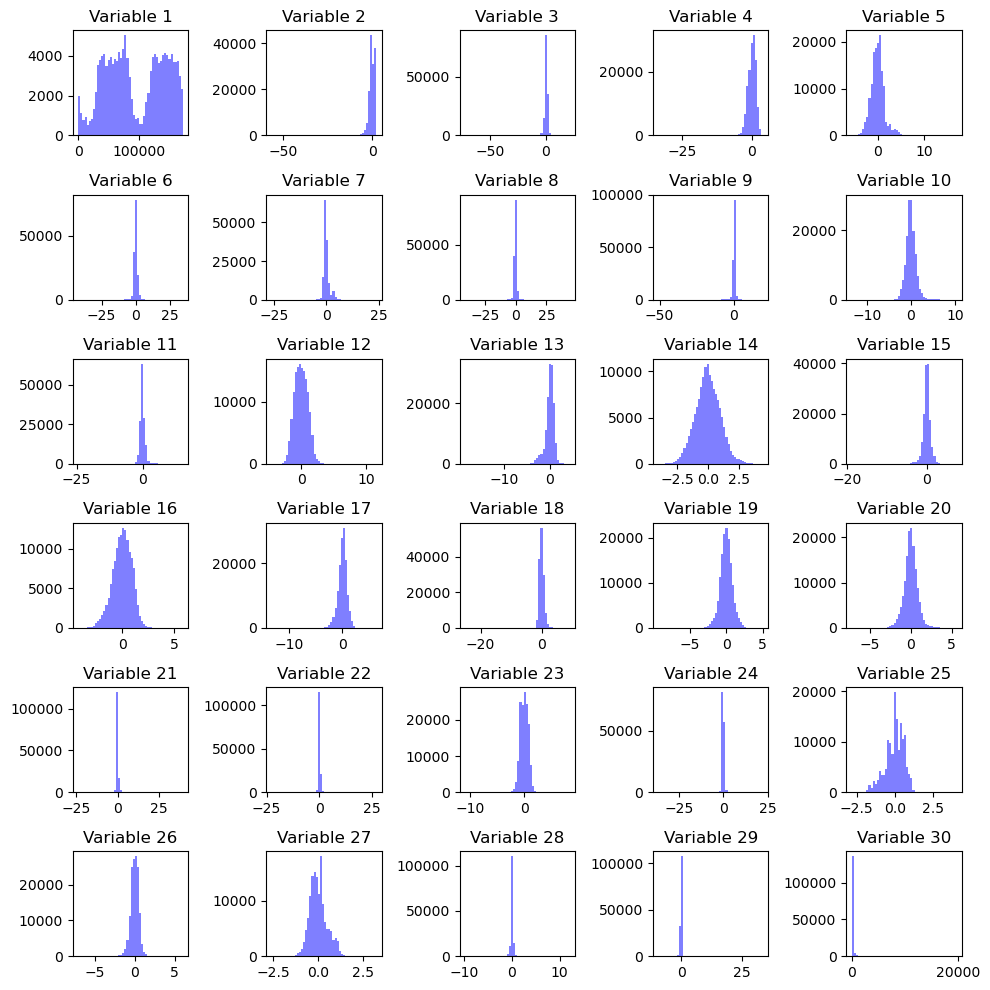

In [10]:
# Check distribution with histogram of each feature
# Note most variables seem to have mean of 0 with exception of Variable 1 (94813.86), and Variable 29 (88.35)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(10, 10))

# Iterate through the grid and create scatter plots
for i in range(6):
    for j in range(5):
        axes[i, j].hist(df2.iloc[:, 5*i + j], bins=50, alpha=0.5, color='blue', label='Variable ' + str(5*i+j+1))
        axes[i, j].set_title(f'Variable {5*i+j+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Boxplots of Features
From the boxplots below, we see there are many points that are "outliers", that is outside $\text{Q2} \pm 1.5 \times \text{IQR} $

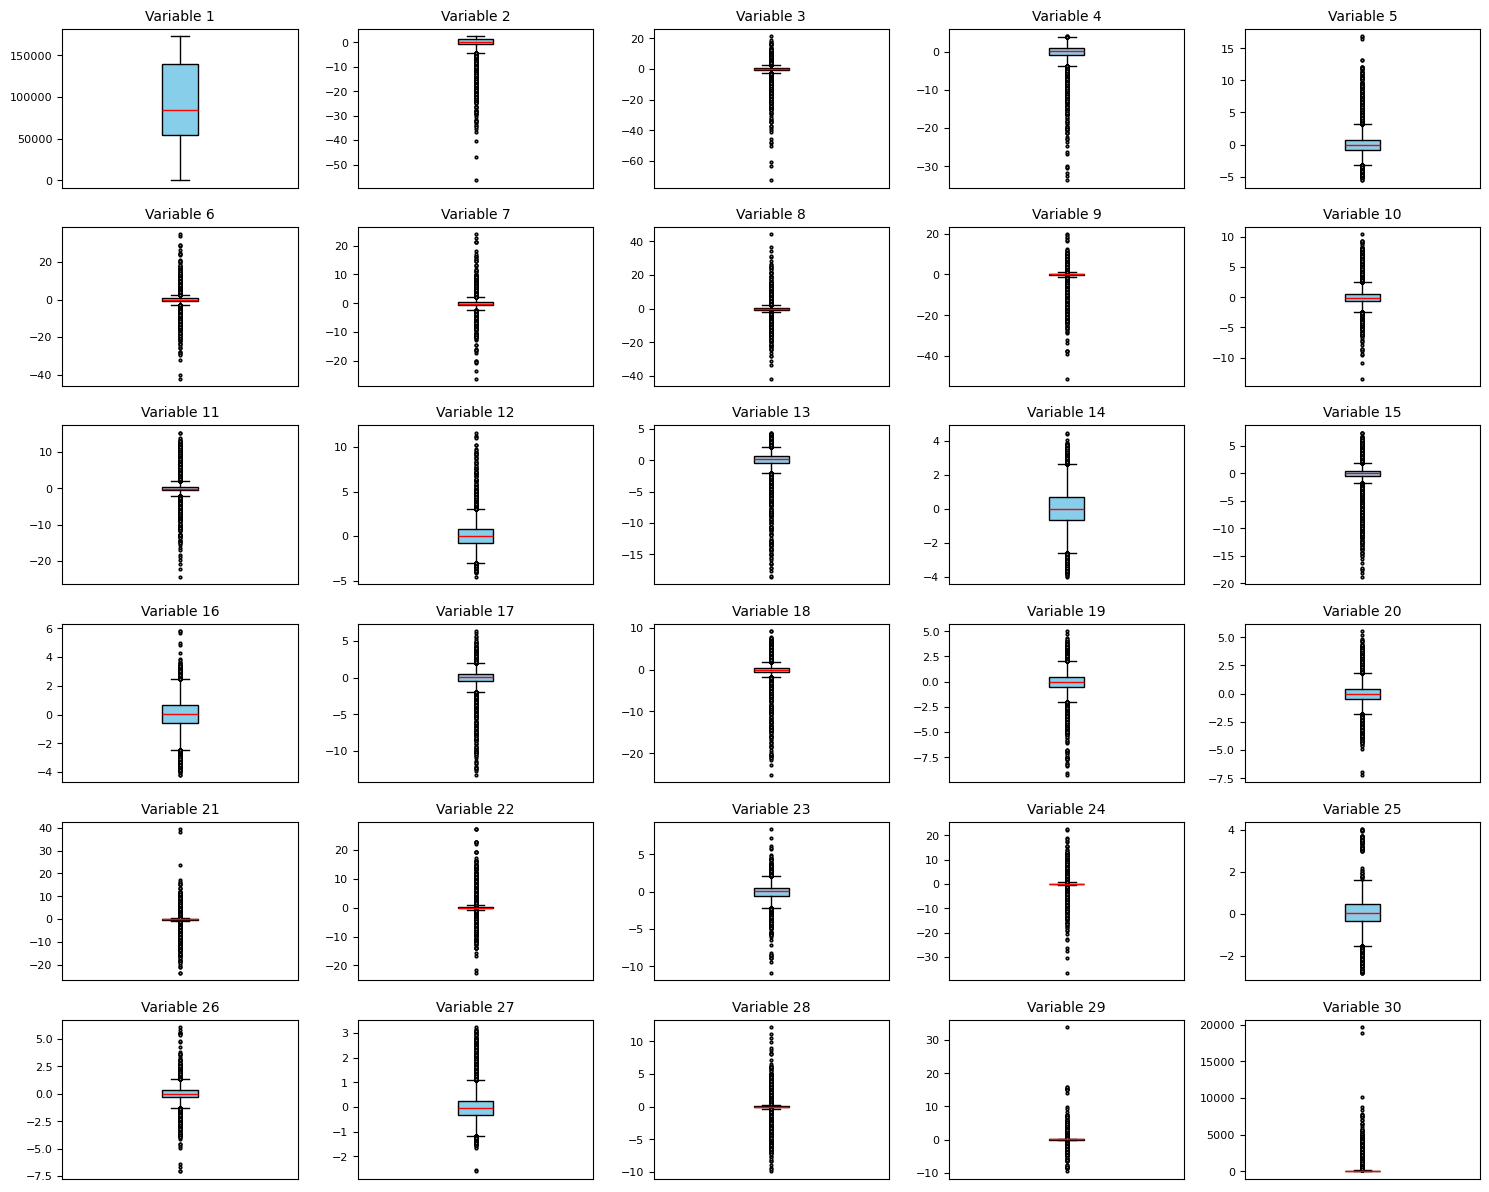

In [11]:
import matplotlib.pyplot as plt

# Visualize the distribution of each feature using box plots
# Each black dot in each box plot represents an outlier. There are a lot of "outliers" in the data
# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Iterate through the grid and create box plots
for i in range(6):
    for j in range(5):
        idx = 5 * i + j
        if idx >= df2.shape[1]:
            axes[i, j].axis('off')  # Turn off empty subplots
            continue
        axes[i, j].boxplot(df2.iloc[:, idx], vert=True, patch_artist=True,
                           boxprops=dict(facecolor='skyblue', color='black'),
                           medianprops=dict(color='red'),
                           whis=1.5,
                           flierprops=dict(marker='o', markersize=2, linestyle='none', markerfacecolor='gray'))
        axes[i, j].set_title(f'Variable {idx+1}', fontsize=10)
        axes[i, j].tick_params(labelsize=8)
        axes[i, j].set_xticks([])  # Hide x-axis labels for cleanliness

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Scatterplot of means and standard deviations across features
The 1st feature 'Time' and 30th feature 'Amount' have means and variances much higher than other features. The left scatter plot excludes them. The right includes them with a log scale--they are the two right- and upper-most points.

Feature 1
Mean: 94636.65, Std: 47530.89
Feature 30
Mean: 87.95, Std: 248.19


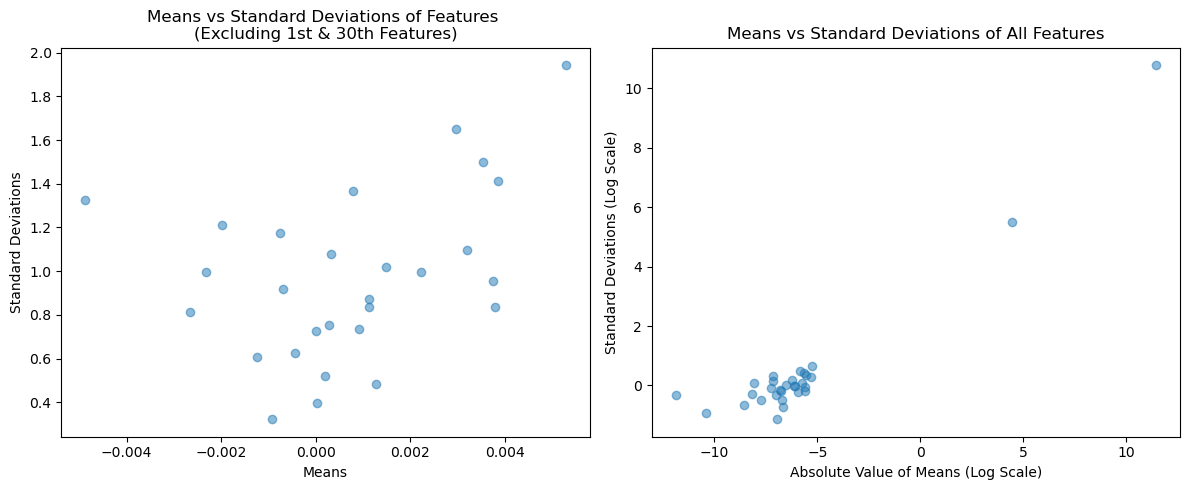

In [12]:
# Means are close to zero, but standard deviations are not close to 1 with exception of 1st and 30th features
# Can see these points on the log scale in the scatter plot to the right
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
X = df2.iloc[:, 0:-1]
means = X.mean().to_numpy()
stds = X.std().to_numpy()
print('Feature 1')
print(f'Mean: {means[0]:.2f}, Std: {stds[0]:.2f}')
print('Feature 30')
print(f'Mean: {means[29]:.2f}, Std: {stds[29]:.2f}')
axes[0].scatter(means[1:-1], stds[1:-1], alpha=0.5)
axes[0].set_xlabel('Means')
axes[0].set_ylabel('Standard Deviations')
axes[0].set_title('Means vs Standard Deviations of Features \n(Excluding 1st & 30th Features)')
# Use log scale for better visualization
axes[1].scatter(np.log(np.abs(means)), np.log(stds), alpha=0.5)
axes[1].set_xlabel('Absolute Value of Means (Log Scale)')
axes[1].set_ylabel('Standard Deviations (Log Scale)')
axes[1].set_title('Means vs Standard Deviations of All Features')
plt.tight_layout()
plt.show()

## Normalization of data
### Normalizating Features
Most features have mean around 0 and are bell-shaped distributions

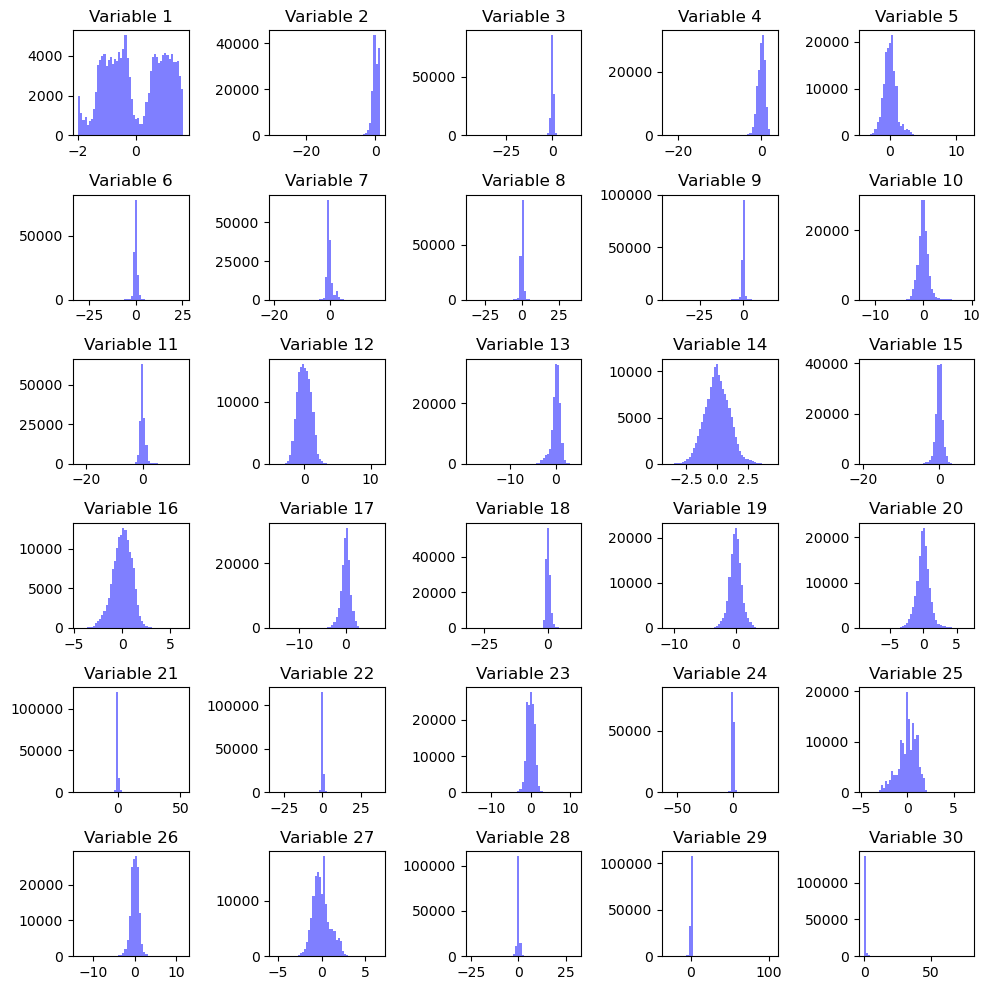

In [13]:
# Standardize all features
scaler = StandardScaler()

# Half of the original dataset
df2_scaled = scaler.fit_transform(df2.drop(columns=['Class']))
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns[:-1])
df2_scaled['Class'] = df2['Class']
df2_scaled.head()

# Check distribution of each feature
# Note most variables seem to have mean of 0 with exception of Variable 1 (94813.86), and Variable 29 (88.35)
# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(10, 10))

# Iterate through the grid and create scatter plots
for i in range(6):
    for j in range(5):
        axes[i, j].hist(df2_scaled.iloc[:, 5*i + j], bins=50, alpha=0.5, color='blue', label='Variable ' + str(5*i+j+1))
        axes[i, j].set_title(f'Variable {5*i+j+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Scatterplot of Means and Stds After Normalization
From the scatterplot we now see that the standard deviations and means are 1 and 0 respectively across all features.

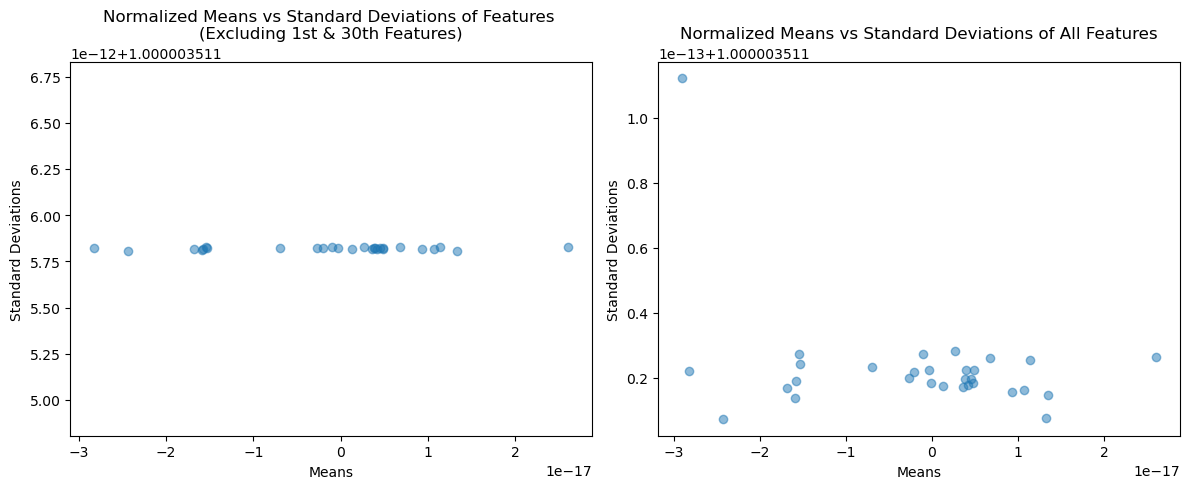

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Means and standard deviations are now close to 0 and 1 respectively
X = df2_scaled.iloc[:, 0:-1]
means = X.mean().to_numpy()
stds = X.std().to_numpy()
axes[0].scatter(means[1:-2], stds[1:-2], alpha=0.5)
axes[0].set_xlabel('Means')
axes[0].set_ylabel('Standard Deviations')
axes[0].set_title('Normalized Means vs Standard Deviations of Features \n(Excluding 1st & 30th Features)')
#plt.scatter(means[1:-2], stds[1:-2], alpha=0.5)
axes[1].scatter(means, stds, alpha=0.5)
axes[1].set_xlabel('Means')
axes[1].set_ylabel('Standard Deviations')
axes[1].set_title('Normalized Means vs Standard Deviations of All Features')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis
## Distribution of Fraudulent and Normal Transactions within Features
### Histograms
From the histograms, we can different behavior between fraud and normal distributions along each feature. For some features such as V21 and V26 fraud and normal distributions are nearly identical. In contrast, there are features such as V14 and V17 where fraud and normal distributions are markedly different.

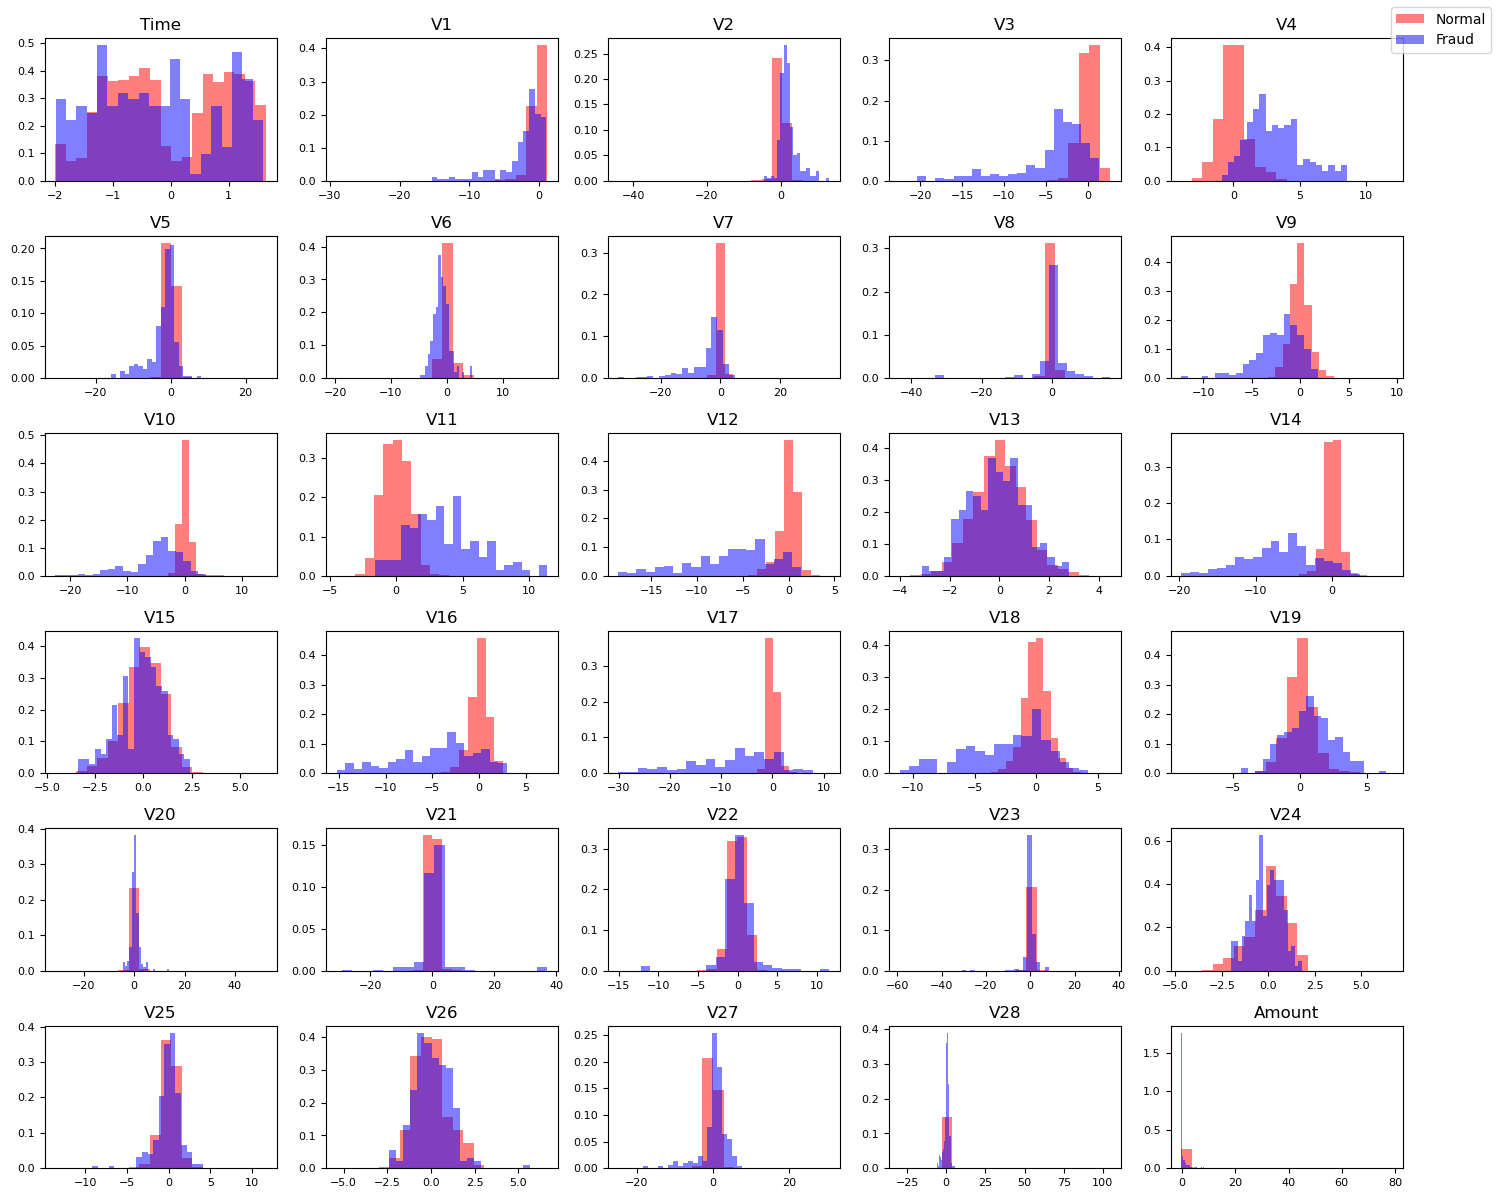

In [15]:
import matplotlib.pyplot as plt
fraud = df2_scaled[df2_scaled['Class'] == 1] 
normal = df2_scaled[df2_scaled['Class'] == 0]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust size as needed

# Loop over the features
for i in range(6):
    for j in range(5):
        idx = 5 * i + j
        if idx >= 30:
            axes[i, j].axis('off')  # Turn off unused subplots if any
            continue
        # Plot normalized histograms for each class
        #idx2 = df.columns.get_loc(mi_scores.index[idx])
        axes[i, j].hist(normal.iloc[:, idx], bins=20, alpha=0.5, color='red', label='Normal', density=True)
        axes[i, j].hist(fraud.iloc[:, idx], bins=20, alpha=0.5, color='blue', label='Fraud', density=True)
        axes[i, j].set_title(df2_scaled.columns[idx])
        axes[i, j].tick_params(labelsize=8)

# Add a single legend for the whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space on right for legend

# Show the plot
plt.show()

### Boxplots
Not much else to add on from the previous observation of the histograms. One point to make is that the box plots for fraudulent cases have minimal outliers compared to normal distributions.

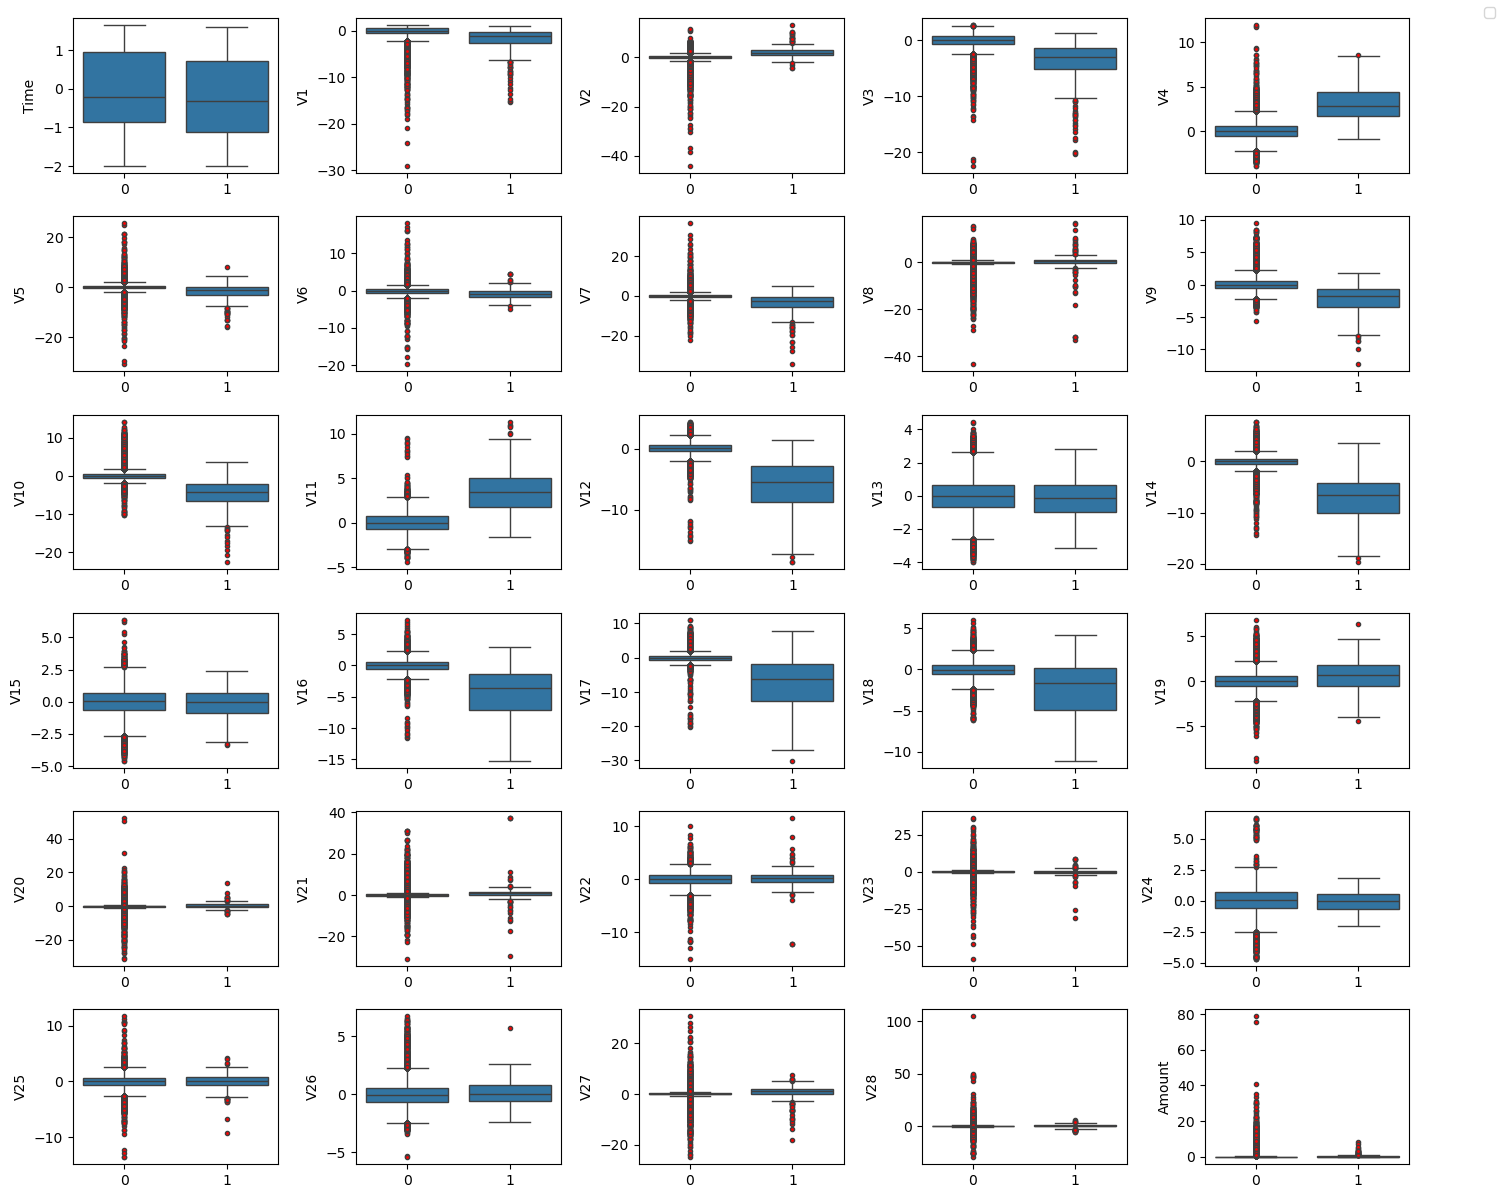

In [16]:
fraud = df2_scaled[df2_scaled['Class'] == 1] 
normal = df2_scaled[df2_scaled['Class'] == 0]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust size as needed

# Loop over the features
for i in range(6):
    for j in range(5):
        idx = 5 * i + j
        if idx >= 30:
            axes[i, j].axis('off')  # Turn off unused subplots if any
            continue
        # Plot normalized histograms for each class
        #idx2 = df.columns.get_loc(mi_scores.index[idx])
        flierprops = dict(marker='o', markersize=3, markerfacecolor='red', linestyle='none')
        sns.boxplot(
            x="Class",
            y=df2_scaled.columns[idx],
            data=df2_scaled,
            ax=axes[i, j],
            flierprops=flierprops
        )
        #sns.boxplot(x="Class", y=mi_scores.index[idx], data=df2_scaled, ax=axes[i, j])
        #axes[i, j].set_title(df2_scaled.columns[idx])
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel(df2_scaled.columns[idx])

# Add a single legend for the whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space on right for legend

# Show the plot
plt.show()

## TSNE
### Introduction
t-sne compresses points in a high-dimensional feature space to a 2D or 3D space. It allows us to see if fraud/normal transactions are separable. First we show examples of t-sne with three dimensional data. One is linked rings. Another is one sphere inside another. Then we do the same for the fraud dataset.

__Note__: For t-sne visualization, a parameter to toggle is perplexity. In some sense it measures the tradeoff between preserved local vs. global structure. At a low perplexity, local spatial relations are clear whereas with an increasing perplexity an increasing attention is put to preserving global structure. Because of the visualization depends on perplexity, it is important to examine clusters across multiple perplexity values.

Links:
* https://medium.com/data-science/t-sne-clearly-explained-d84c537f53a
* https://distill.pub/2016/misread-tsne/

#### Interlocked Rings
We examine a pair of interlocked rings observe behavior of t-sne visualizations

In [17]:
import plotly.express as px

num_points = 40
# First ring round z-axis
x1 = np.cos(np.linspace(0, 2 * np.pi, num_points)) 
y1 = np.sin(np.linspace(0, 2 * np.pi, num_points))
z1 = np.zeros(num_points)

# Add noise 
x1 += np.random.normal(0, 0.05, num_points)
y1 += np.random.normal(0, 0.05, num_points)
z1 += np.random.normal(0, 0.05, num_points)

# Second ring around y-axis
x2 = np.sin(np.linspace(0, 2 * np.pi, num_points)) + 1.0
y2 = np.zeros(num_points)
z2 = np.cos(np.linspace(0, 2 * np.pi, num_points))

# Add noise 
x2 += np.random.normal(0, 0.05, num_points)
y2 += np.random.normal(0, 0.05, num_points)
z2 += np.random.normal(0, 0.05, num_points)

# Create dataframe containing all points with class 
rings = pd.DataFrame()
rings['x'] = np.concatenate([x1, x2])
rings['y'] = np.concatenate([y1, y2])
rings['z'] = np.concatenate([z1, z2])
rings['Class'] = np.concatenate([np.zeros(num_points), np.ones(num_points)])
rings['Class'] = rings['Class'].astype('category')
rings['Class'] = rings['Class'].cat.rename_categories(['0', '1'])
rings['size'] = 10 * np.ones(rings.shape[0])

# Create a 3D scatter plot
# Plot using Plotly Express
fig = px.scatter_3d(
    rings, x='x', y='y', z='z',
    color='Class',  # Optional mapping
    size='size',
    size_max=10,
    title='Interlocked Rings',
    opacity=0.6
)
fig.show()

#### 2D TSNE of Interlocked Rings
Initially, with perplexity of 1 and 2, the algorithm clusters points that are marginally close based on randomness and does not learn the global behavior. As perplexity increases, the algorithm better visualizes the global structure of two clusters.

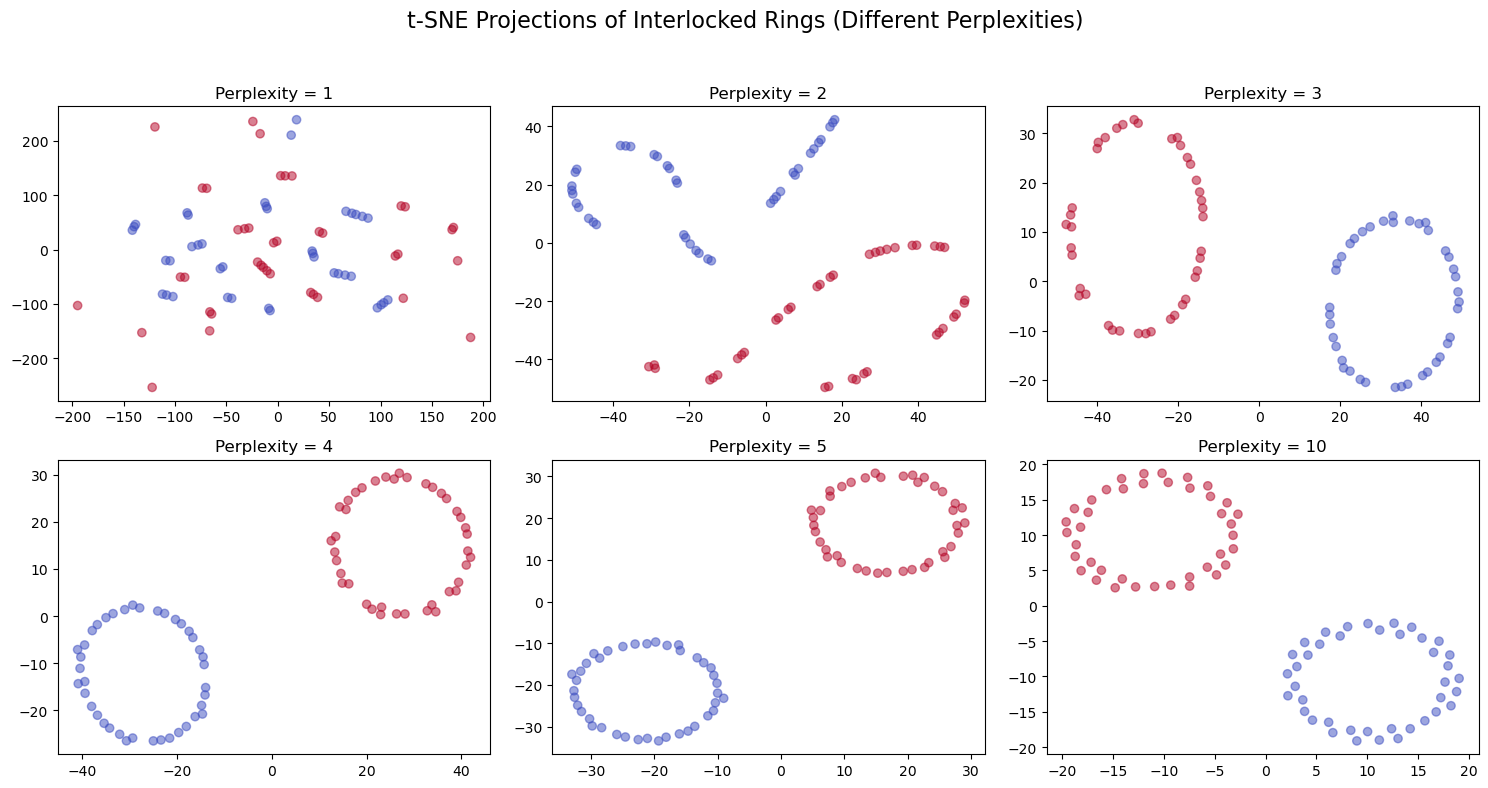

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Features and labels
X = rings.drop('Class', axis=1)
y = rings['Class']

# Define perplexity values
perplexities = [1, 2, 3, 4, 5, 10]

# Create a grid of subplots: 2 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # Flatten to make iteration easier

# Loop through each perplexity and axis
for i, perplexity in enumerate(perplexities):
    ax = axes[i]
    X_embedded = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X)
    
    sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=(y == '1'), cmap="coolwarm", alpha=0.5)
    ax.set_title(f"Perplexity = {perplexity}")

# Global layout adjustments
plt.suptitle("t-SNE Projections of Interlocked Rings (Different Perplexities)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


#### 3D TSNE of Rings

In [19]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Features and class labels
X = rings.drop('Class', axis=1)
y = rings['Class']

# Combine features and labels for convenience
df = X.copy()
df['Class'] = y

# Define perplexity values
perplexities = [1, 2, 3, 4, 5, 10]

# Create subplot grid: 2 rows × 3 columns, each with a 3D scene
fig = make_subplots(
    rows=2, cols=3,
    specs=[[{'type': 'scene'}]*3]*2,
    subplot_titles=[f"Perplexity = {p}" for p in perplexities]
)

# Loop through perplexities
for idx, perplexity in enumerate(perplexities):
    row = idx // 3 + 1
    col = idx % 3 + 1

    # Run t-SNE
    X_embedded = TSNE(n_components=3, perplexity=perplexity, random_state=42).fit_transform(X)

    # Build a DataFrame to plot with Plotly Express-style grouping
    tsne_df = pd.DataFrame(X_embedded, columns=['x', 'y', 'z'])
    tsne_df['Class'] = y.values

    # For each class, add a trace
    for cls in tsne_df['Class'].unique():
        class_df = tsne_df[tsne_df['Class'] == cls]
        fig.add_trace(
            go.Scatter3d(
                x=class_df['x'],
                y=class_df['y'],
                z=class_df['z'],
                mode='markers',
                name=str(cls),
                marker=dict(size=3),
                legendgroup=str(cls),
                showlegend=(idx == 0),  # Only show legend once (first plot)
            ),
            row=row, col=col
        )

# Final layout settings
fig.update_layout(
    height=800, width=1200,
    title_text="3D t-SNE Projections at Varying Perplexities (Colored by Class)",
    title_x=0.5,
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()

#### Hollow Spheres
Another example. One sphere is inside another.

In [20]:
num_points = 200

# Inner sphere
x1 = np.random.normal(0, 1, num_points)
y1 = np.random.normal(0, 1, num_points)
z1 = np.random.normal(0, 1, num_points)

# Stack into a (20, 3) array
X = np.stack([x1, y1, z1], axis=1)
norms = np.linalg.norm(X, axis=1, keepdims=True)
X_normalized = X / norms

# Outer sphere
X_normalized2 = 2*X_normalized + np.random.normal(0, 0.05, X_normalized.shape)

# Create a DataFrame containing both datasets
s0 = pd.DataFrame(X_normalized, columns=['x', 'y', 'z'])
s1 = pd.DataFrame(X_normalized2, columns=['x', 'y', 'z'])
s0['Class'] = '0'
s1['Class'] = '1'
spheres = pd.concat([s0, s1], axis=0)
spheres['size'] = 10 * np.ones(spheres.shape[0])

# Create a 3D scatter plot
fig = px.scatter_3d(
    x=spheres['x'], 
    y=spheres['y'], 
    z=spheres['z'],
    color=spheres['Class'],
    size=spheres['size'],
    size_max=10,
    title='Hollow Spheres',
    opacity=0.6
)
fig.show()

#### 2D TSNE of Spheres
If we didn't know anything about the original data, based on the 2D TSNE visualizations we could get that one class is contained inside another. Again, at the lower perplexity values (1, 2, 5) the visualizations only depict the local structures: some points on our sphere are particularly close to other points which leads to the small clusters on the visualization. At higher perplexity values (20, 50, 100) the global structure is more readily seen.

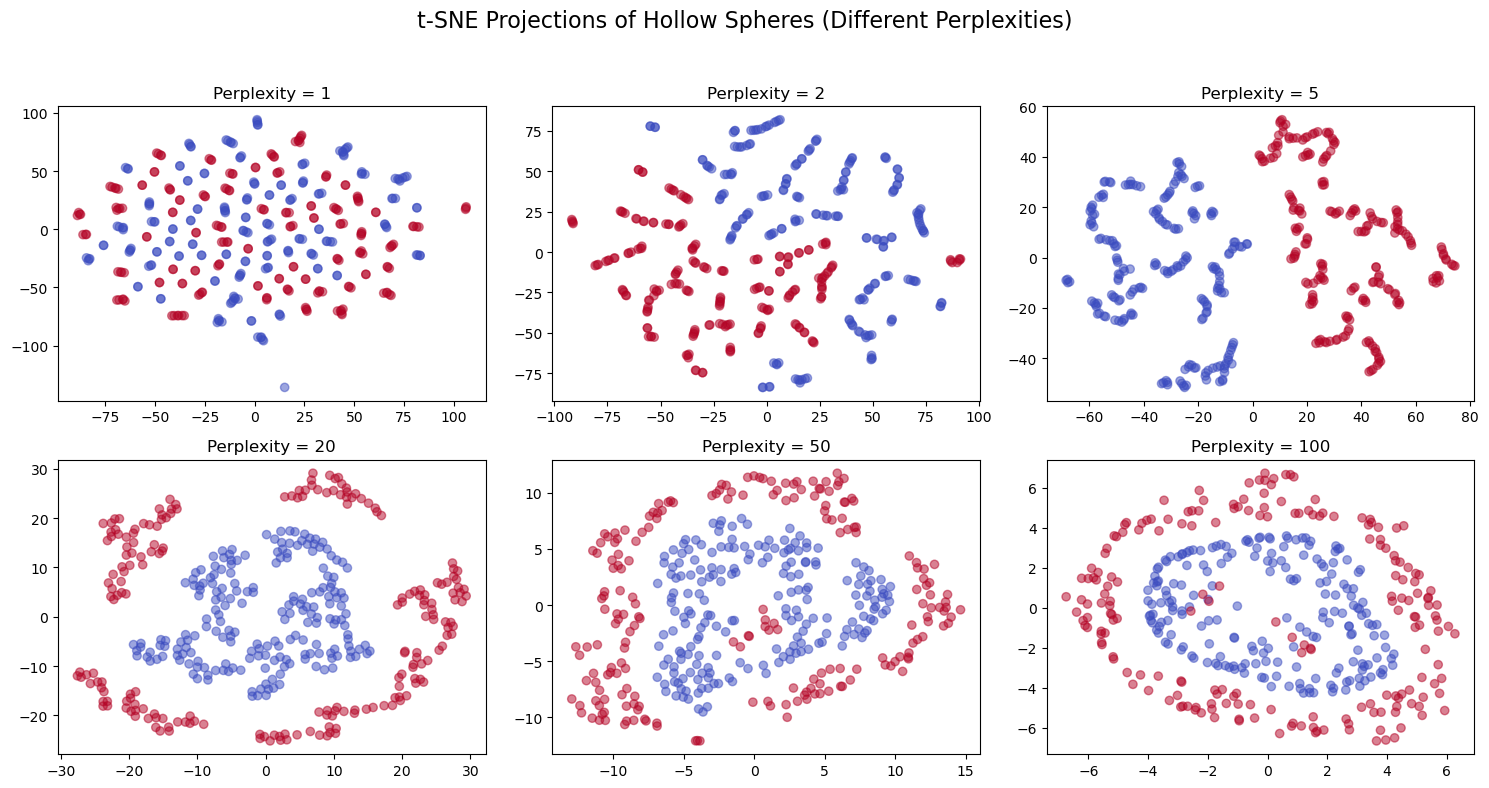

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Features and labels
X = spheres.drop('Class', axis=1)
y = spheres['Class']

# Define perplexity values
perplexities = [1, 2, 5, 20, 50, 100]
#perplexities = [1, 2, 5, 10, 20, 30, 40, 50, 100]

# Create a grid of subplots: 2 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # Flatten to make iteration easier

# Loop through each perplexity and axis
for i, perplexity in enumerate(perplexities):
    ax = axes[i]
    X_embedded = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X)
    
    sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=(y == '1'), cmap="coolwarm", alpha=0.5)
    ax.set_title(f"Perplexity = {perplexity}")

# Global layout adjustments
plt.suptitle("t-SNE Projections of Hollow Spheres (Different Perplexities)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


### t-sne for fraud dataset
From what we have just seen, t-sne can help visualize clusters of high-dimensional data that are not linearly separable. Below are 2D and 3D visualizations for the fraud dataset. The 3D plot is interactive. You can rotate with your cursor. From the visualizations below, we find that the classes are fairly separable. There are roughly 20% of fraud points that are hard to separate from normal points. t-sne might not be able to fully depict the high-dimensional structure

#### 2D TSNE for Fraud Data

In [22]:
df2_scaled['Class'].value_counts()

Class
0    142177
1       227
Name: count, dtype: int64

_run time_: 2m 25s

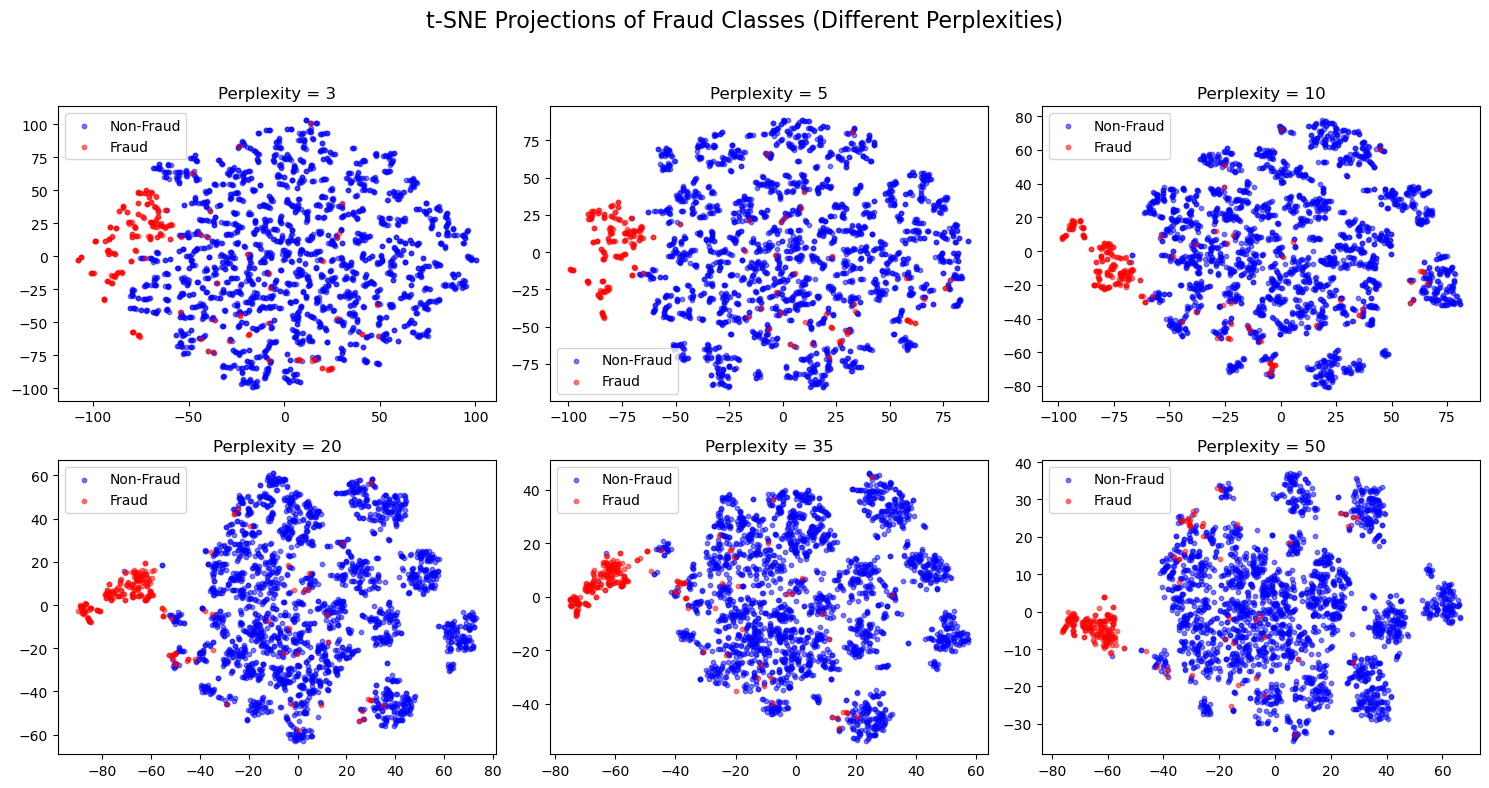

In [23]:
# Features and labels
X = df2_scaled.drop('Class', axis=1)
y = df2_scaled['Class']
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Define perplexity values
perplexities = [3, 5, 10, 20, 35, 50]

# Create a grid of subplots: 3 rows × 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()  # Flatten to make iteration easier

"""# Loop through each perplexity and axis
for i, perplexity in enumerate(perplexities):
    ax = axes[i]
    X_embedded = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X_resampled)
    
    #sc = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_resampled, cmap="coolwarm", alpha=0.5)
    #ax.set_title(f"Perplexity = {perplexity}")
    # Plot each class separately to add labels
    for class_value, label in zip([0, 1], ['Non-Fraud', 'Fraud']):
        idx = y_resampled == class_value
        ax.scatter(X_embedded[idx, 0], X_embedded[idx, 1], 
                   label=label, alpha=0.5, cmap="coolwarm", c=[class_value]*sum(idx))

    ax.set_title(f"Perplexity = {perplexity}")
    ax.legend()
"""
    
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Non-Fraud', 1: 'Fraud'}

for i, perplexity in enumerate(perplexities):
    ax = axes[i]
    X_embedded = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X_resampled)

    for class_value in [0, 1]:
        idx = y_resampled == class_value
        ax.scatter(
            X_embedded[idx, 0],
            X_embedded[idx, 1],
            color=colors[class_value],
            label=labels[class_value],
            alpha=0.5,
            s=10
        )
    ax.set_title(f"Perplexity = {perplexity}")
    ax.legend()

# Global layout adjustments
plt.suptitle("t-SNE Projections of Fraud Classes (Different Perplexities)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

## Effect of RandomUnderSampler on Decision Boundary

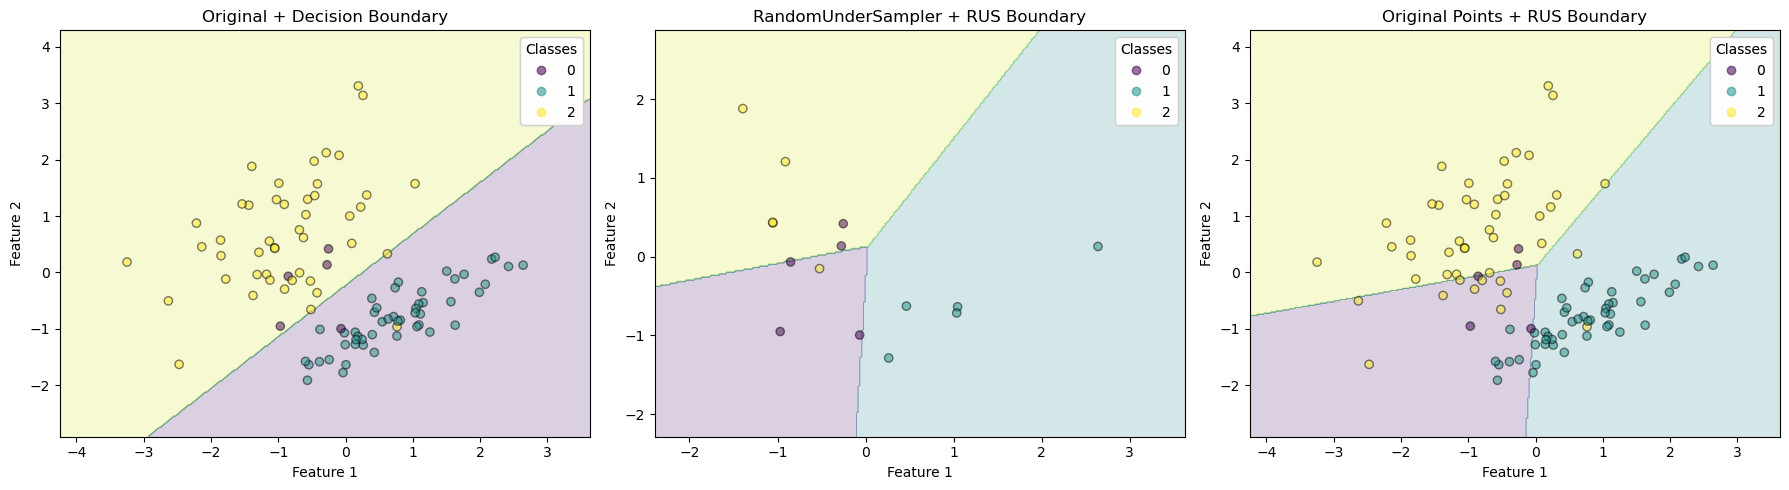

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Data generation parameters
n_samples = 100
n_classes = 3
n_clusters = 1
weights = (0.05, 0.50, 0.45)
class_sep = 0.8

# Generate synthetic classification data
X, y = make_classification(
    n_samples=n_samples,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters,
    weights=list(weights),
    class_sep=class_sep,
    random_state=5,
)

# Logistic Regression model
lr = LogisticRegression(multi_class='ovr', solver='lbfgs')

# Helper function to plot decision boundaries
def plot_decision_boundary(ax, model, X, y, plot_data=True):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2)
    if plot_data:
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolor="k")
        legend = ax.legend(*scatter.legend_elements(), title="Classes")
        ax.add_artist(legend)

# Subplot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First subplot: original data + decision boundary
lr.fit(X, y)
axes[0].set_title("Original + Decision Boundary")
plot_decision_boundary(axes[0], lr, X, y)

# Second subplot: undersampled data + its decision boundary
rus = RandomUnderSampler(sampling_strategy={0: 5, 1: 5, 2:5}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
lr_rus = LogisticRegression(multi_class='ovr', solver='lbfgs')
lr_rus.fit(X_resampled, y_resampled)
axes[1].set_title("RandomUnderSampler + RUS Boundary")
plot_decision_boundary(axes[1], lr_rus, X_resampled, y_resampled)

# Third subplot: original data + RUS boundary
axes[2].set_title("Original Points + RUS Boundary")
plot_decision_boundary(axes[2], lr_rus, X, y)

# Label axes
for ax in axes:
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


## Effect of RandomOverSampler on Decision Boundary

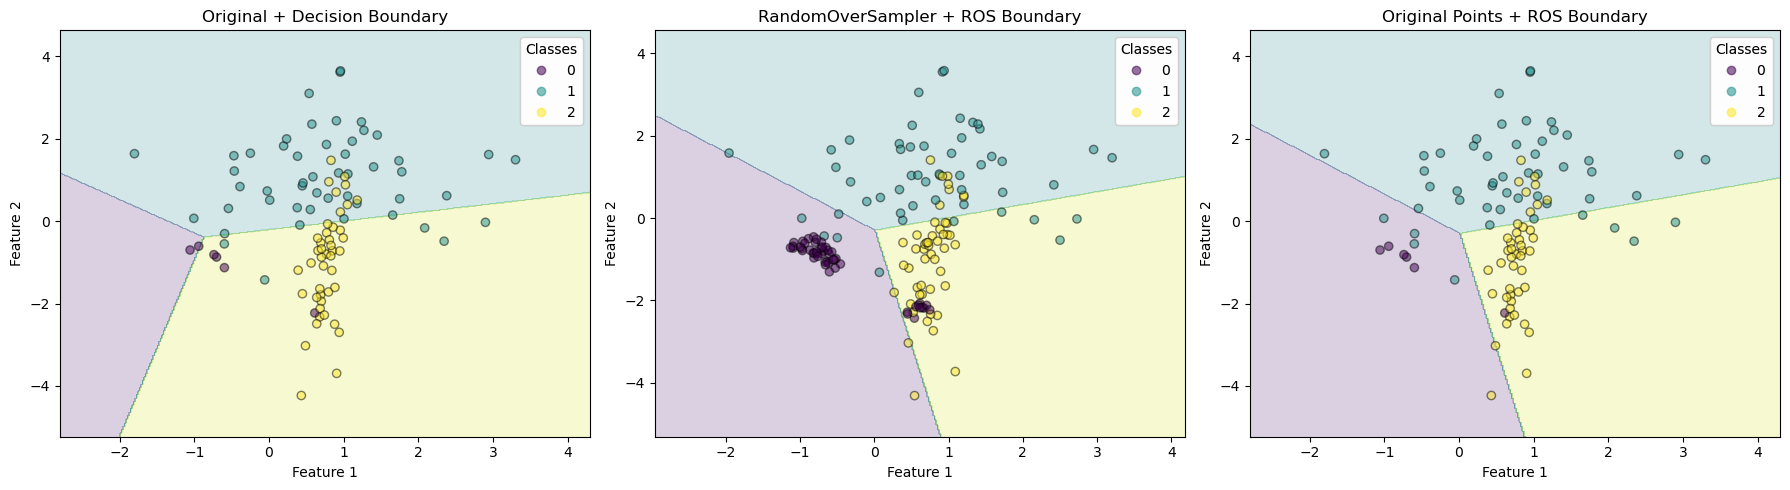

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Jitter function
def add_jitter(X, jitter_strength=0.1):
    noise = np.random.normal(0, jitter_strength, X.shape)
    return X + noise

# Data generation parameters
n_samples = 100
n_classes = 3
n_clusters = 1
weights = (0.05, 0.50, 0.45)
class_sep = 0.8

# Generate synthetic classification data
X, y = make_classification(
    n_samples=n_samples,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=n_classes,
    n_clusters_per_class=n_clusters,
    weights=list(weights),
    class_sep=class_sep,
    random_state=6,
)

# Logistic Regression model
lr = LogisticRegression(multi_class='ovr', solver='lbfgs')

# Helper function to plot decision boundaries
def plot_decision_boundary(ax, model, X, y, plot_data=True):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2)
    if plot_data:
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolor="k")
        legend = ax.legend(*scatter.legend_elements(), title="Classes")
        ax.add_artist(legend)

# Subplot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First subplot: original data + decision boundary
lr.fit(X, y)
axes[0].set_title("Original + Decision Boundary")
plot_decision_boundary(axes[0], lr, X, y)

# Second subplot: undersampled data + its decision boundary
rus = RandomOverSampler(sampling_strategy={0: 50, 1: 50, 2:50}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
X_resampled_jittered = add_jitter(X_resampled, jitter_strength=0.1)
lr_rus = LogisticRegression(multi_class='ovr', solver='lbfgs')
lr_rus.fit(X_resampled, y_resampled)
axes[1].set_title("RandomOverSampler + ROS Boundary")
plot_decision_boundary(axes[1], lr_rus, X_resampled_jittered, y_resampled)

# Third subplot: original data + RUS boundary
axes[2].set_title("Original Points + ROS Boundary")
plot_decision_boundary(axes[2], lr_rus, X, y)

# Label axes
for ax in axes:
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


## Oversampling (SMOTE)
This section has few purposes. First, we want to explain how resampling works, specifically SMOTE. Second, we want to see if there is potential for SMOTE to cause issues when interpolating. Specifically, if the interpolated data points land inside the normal class cluster. Third, we want to see if variations of SMOTE might be more effective. We conclude the variations BorderlineSMOTE and SVMSMOTE might perform better than SMOTE.

Financial data is heavily imbalanced. Fraud rate is about 0.17%. One way to deal with this is sampling methods. Basic undersampling involves taking a subsample the original data such that fraud/normal ratio in the subsample is higher such as 10% fraud or 50/50. Undersampling is more straightforward. There are multiple ways to oversample, but we focus on the Synthetic Minority Oversampling Technique (SMOTE) in this section. SMOTE works by creating new points from the minority class by interpolation.

### Basic Example of SMOTE
#### Data Creation
Below we create two classes of points with sci-kit learn's make classfication algorithm. You can see the minority class visually. We will use SMOTE to fix the imbalance ratio.

0    494
1      6
Name: count, dtype: int64


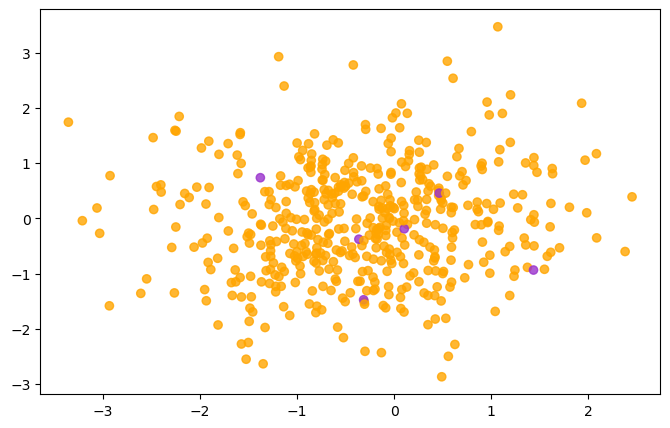

In [26]:
# imports
from sklearn.datasets import make_classification
import matplotlib

X, y = make_classification(n_samples=500, 
                            n_classes=2,
                            n_features=2,
                            n_informative=2, 
                            n_redundant=0, 
                            n_repeated=0,
                            weights=[0.99, 1-0.99],
                            class_sep=0.3,
                            random_state=2)
# Show imbalance ratio
y = pd.Series(y)
print(y.value_counts())

# define the colours to use
my_cmap = matplotlib.colors.ListedColormap(['orange', 'darkorchid'])
# now make a scatter plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=my_cmap, alpha=0.8)
plt.show()

#### SMOTE Implementation
sampling_strategy can take a float in the unit interval, which is the desired ratio of minority/majority. You can see in the output that the ratio between the classes is one.

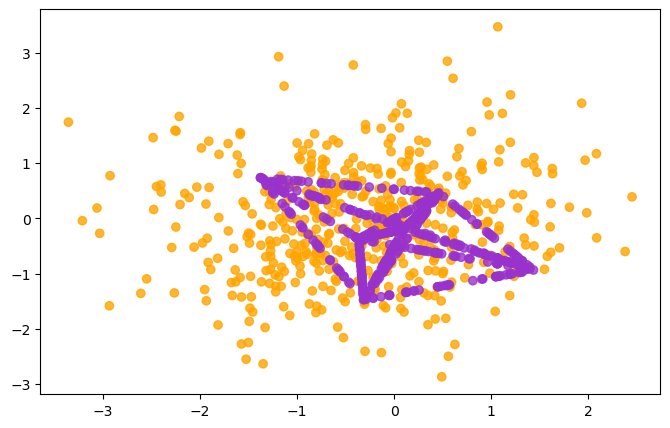

Class
0    494
1    494
Name: count, dtype: int64

In [27]:
X_resampled, y_resampled = SMOTE(sampling_strategy=1).fit_resample(X, y)
# now plot again
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=my_cmap, alpha=0.8)
plt.show()

data = pd.DataFrame(X_resampled, columns=['Feature 1', 'Feature 2'])
data['Class'] = y_resampled
data['Class'].value_counts()

### SMOTE for Fraud

Now we apply SMOTE to the fraud dataset. In the previous example, the data had two features and thus was easy to visualize the effect of SMOTE. However, our fraud dataset is high-dimensional (30 features). Luckily, we can use t-sne visualizations to get an idea of SMOTE's (and its variations) interpolation behavior. Specifically, we notice that interpolating can cause problems for the regions where there is a mixture of fraud and normal transactions. This problem seems to be somewhat mitigated with BorderlineSMOTE and SVMSMOTE (based upon a first glance) as they build more points around the edge of the normal transaction region than regular SMOTE. 

#### TSNE Visualization of SMOTE on Fraud Data
In the below cell, we apply SMOTE to our fraud data, take an undersample to reduce amount redundancy/overlap of normal cases, and apply tsne transformation.

__Note__: The red/blue plot contrasts fraud/non-fraud cases. However, the yellow/blue plots contrast the new points due to oversampling from the original data points. 

Class
0    568
1    568
Name: count, dtype: int64


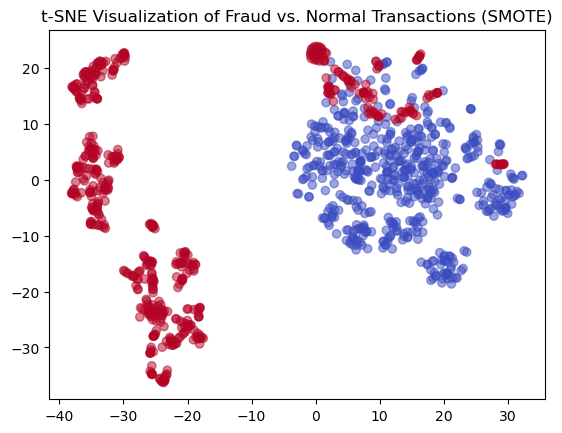

In [34]:
# Download tenth size of original dataset
df10 = pd.read_csv("creditcard10.csv")

# Half of the original dataset
df10_scaled = scaler.fit_transform(df10.drop(columns=['Class']))
df10_scaled = pd.DataFrame(df10_scaled, columns=df10.columns[:-1])
df10_scaled['Class'] = df10['Class']

X = df10_scaled.drop('Class', axis=1)
y = df10_scaled['Class']
smote = SMOTE(sampling_strategy=0.02, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

under = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled2, y_resampled2 = under.fit_resample(X_resampled, y_resampled)
print(y_resampled2.value_counts())

X_embedded = TSNE(n_components=2, random_state=42, perplexity=45).fit_transform(X_resampled2)

#x_jittered = x + np.random.normal(loc=0, scale=0.05, size=len(x))
# Add jitter to the x-coordinates and y-coordinates

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_resampled2, cmap="coolwarm", alpha=0.5)
plt.title("t-SNE Visualization of Fraud vs. Normal Transactions (SMOTE)")
plt.show()

#### TSNE Visualizations of SMOTE Across Multiple Perplexities
The tsne visualizations can be sensitive to perplexity value, so to better understand the underlying structure it helps to see multiple visualizations across multiple perplexity values. Below, the light blue represents the original points (both fraud and legitimate) and the yellow represents synthetic points from SMOTE.

_run time_: 55.1s

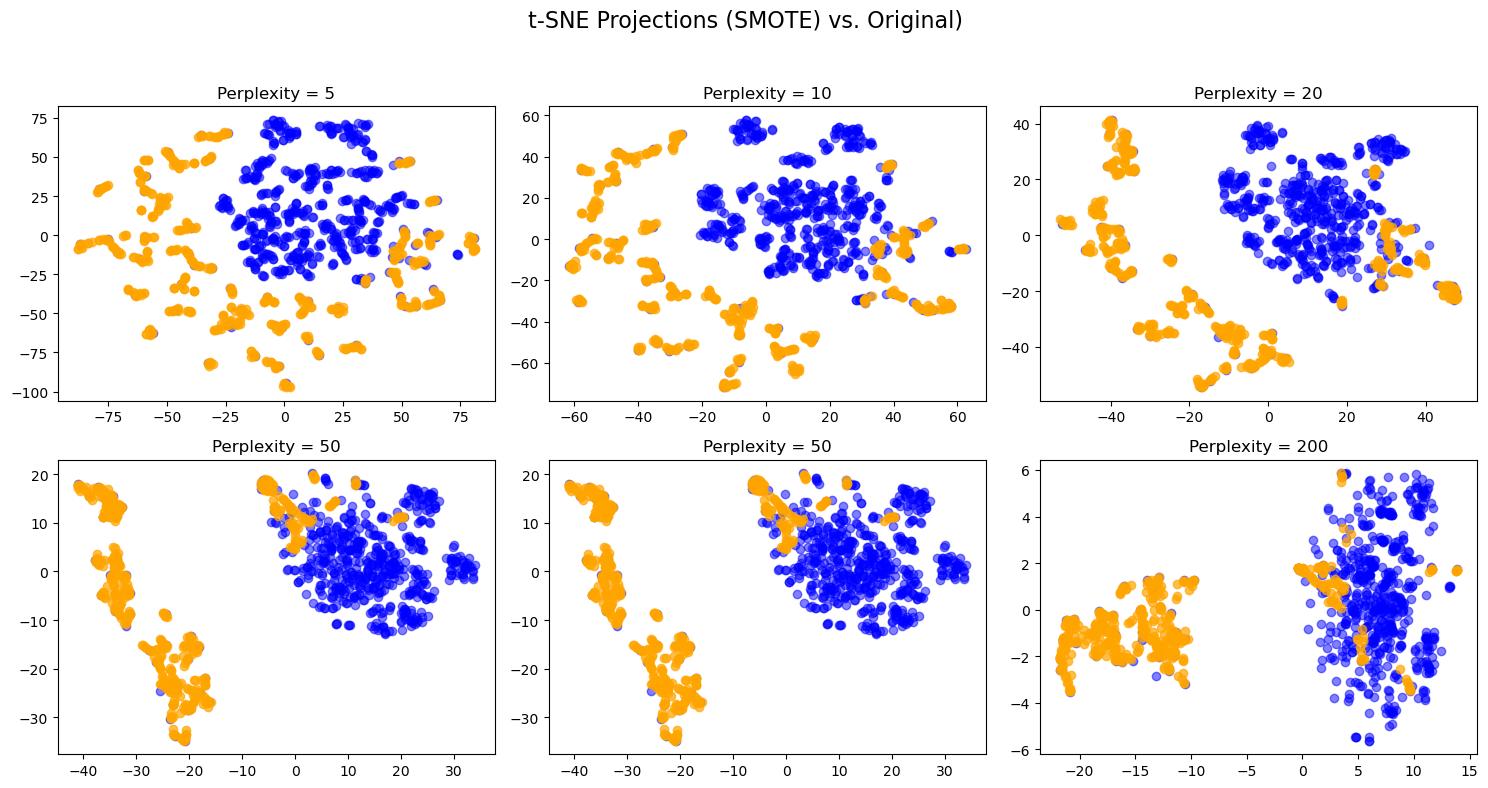

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def get_oversampling_data(df, model, sampling_strategy, random_state):
    """
    Function to apply oversampling using the specified model and sampling strategy.

    Outputs:
    - X_resampled: Resampled feature set
    - y_resampled: Resampled target variable
    - is_synthetic2: Boolean array indicating which points are synthetic
    """
    # Start with original data
    X = df.drop('Class', axis=1)
    y = df['Class']

    # Apply SMOTE
    smote = model(sampling_strategy=sampling_strategy, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Track which points are synthetic using index
    n_original = len(X)
    synthetic_mask = np.array([False] * n_original + [True] * (len(X_resampled) - n_original))

    # Convert to DataFrame and add synthetic label
    X_res_df = pd.DataFrame(X_resampled, columns=X.columns)
    X_res_df['is_synthetic'] = synthetic_mask
    X_res_df['Class'] = y_resampled.reset_index(drop=True)

    # Apply undersampling
    under = RandomUnderSampler(sampling_strategy=1, random_state=random_state)
    X_resampled2, y_resampled2 = under.fit_resample(X_res_df.drop(columns='is_synthetic'), X_res_df['Class'])

    # Now recover the is_synthetic labels after undersampling using index
    X_resampled2_df = pd.DataFrame(X_resampled2, columns=X.columns)
    merged_df = X_res_df.reset_index(drop=True)
    # Create a combined key (tuple) for exact row matching
    merged_df['key'] = merged_df[X.columns].apply(tuple, axis=1)
    X_resampled2_df['key'] = X_resampled2_df.apply(tuple, axis=1)

    # Merge on the tuple key
    final_df = pd.merge(
        X_resampled2_df, 
        merged_df[['key', 'is_synthetic']], 
        on='key', 
        how='left'
    )
    #final_df = final_df.drop(410)

    # Drop any rows with missing values to ensure alignment
    final_df = final_df.dropna(subset=['is_synthetic'])
    final_df = final_df.drop_duplicates(keep='first')

    # Ensure is_synthetic2 matches the length of X_resampled2
    is_synthetic2 = final_df['is_synthetic'].values.astype(bool)

    return X_resampled2, y_resampled2, is_synthetic2

def plot_oversampling_data(X_resampled2, is_synthetic2, model_name):
    """
    Function to plot the t-SNE visualization of the oversampled data.

    Outputs:
    - None
    """
    # Create an array of 23 True values
    #additional_trues = np.ones(23, dtype=bool)

    # Append the True values
    #is_synthetic2 = np.append(is_synthetic2, additional_trues)

    # Create a grid of subplots: 2 rows × 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()  # Flatten to make iteration easier
    #perplexities = [25, 50, 100, 250, 500, 1000]
    perplexities = [5, 10, 20, 50, 50, 200]

    for i, perplexity in enumerate(perplexities):
        ax = axes[i]
        X_embedded = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X_resampled2)
        
        sc = ax.scatter(X_embedded[~is_synthetic2, 0], X_embedded[~is_synthetic2, 1], c='blue', label='Original', alpha=0.5)
        sc = ax.scatter(X_embedded[is_synthetic2, 0], X_embedded[is_synthetic2, 1], c='orange', label='SMOTE-generated', alpha=0.7)

        ax.set_title(f"Perplexity = {perplexity}")

    # Global layout adjustments
    plt.suptitle(f"t-SNE Projections ({model_name}) vs. Original)", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
    plt.show()

X_resampled2, y_resampled2, is_synthetic2 = get_oversampling_data(
    df10_scaled,
    model=SMOTE,
    sampling_strategy=0.02,
    random_state=42
)

plot_oversampling_data(X_resampled2, is_synthetic2, model_name="SMOTE")

#### TSNE for BorderlineSMOTE
Now we apply a variation of SMOTE: BorderlineSMOTE.

_run time_: 53.5s

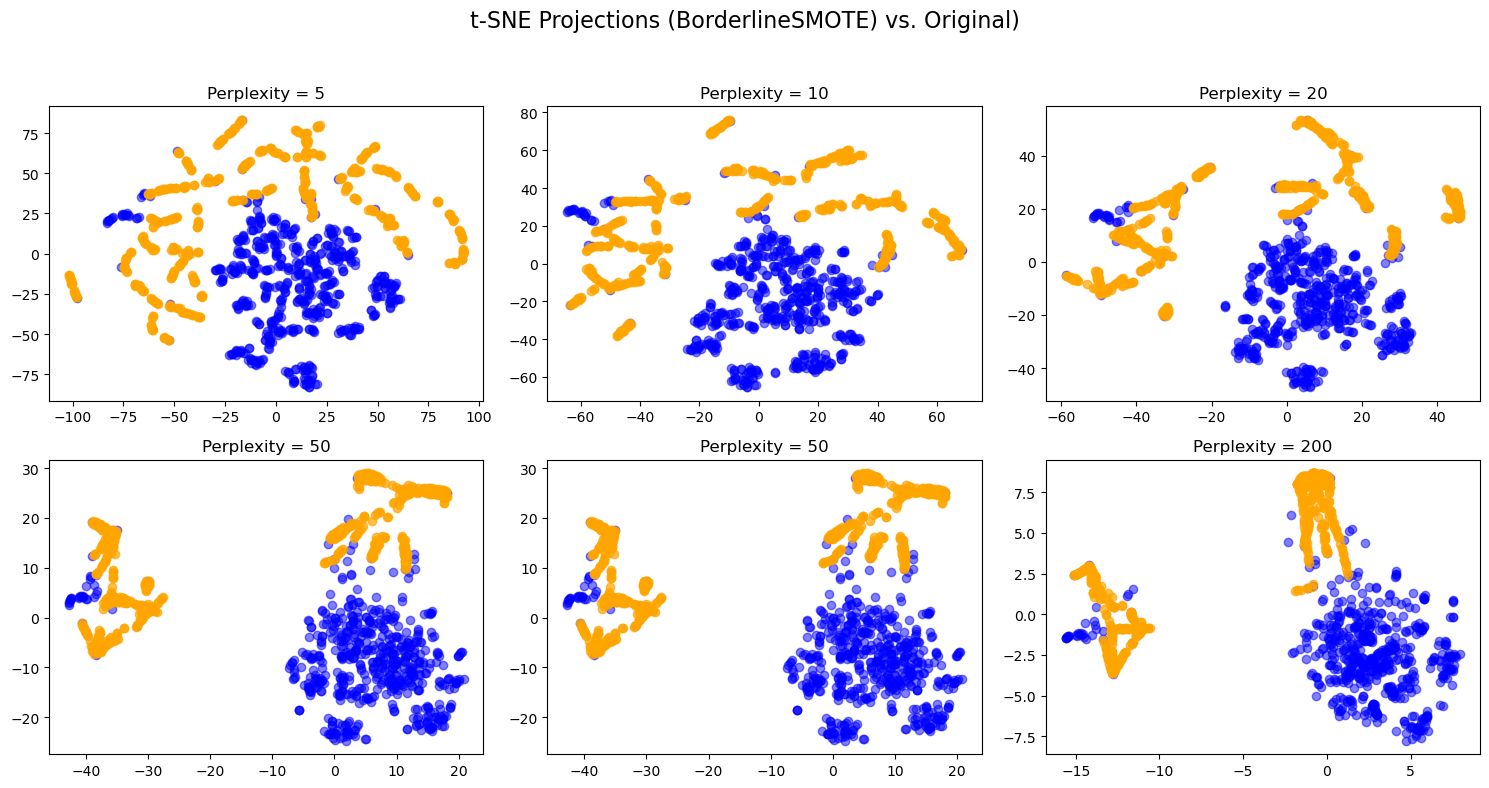

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE


X_resampled2, y_resampled2, is_synthetic2 = get_oversampling_data(
    df10_scaled,
    model=BorderlineSMOTE,
    sampling_strategy=0.02,
    random_state=42
)

plot_oversampling_data(X_resampled2, is_synthetic2, model_name="BorderlineSMOTE")

#### TSNE for SVMSMOTE
Another variation of SMOTE is SVMSMOTE

_run time_: 57.8s

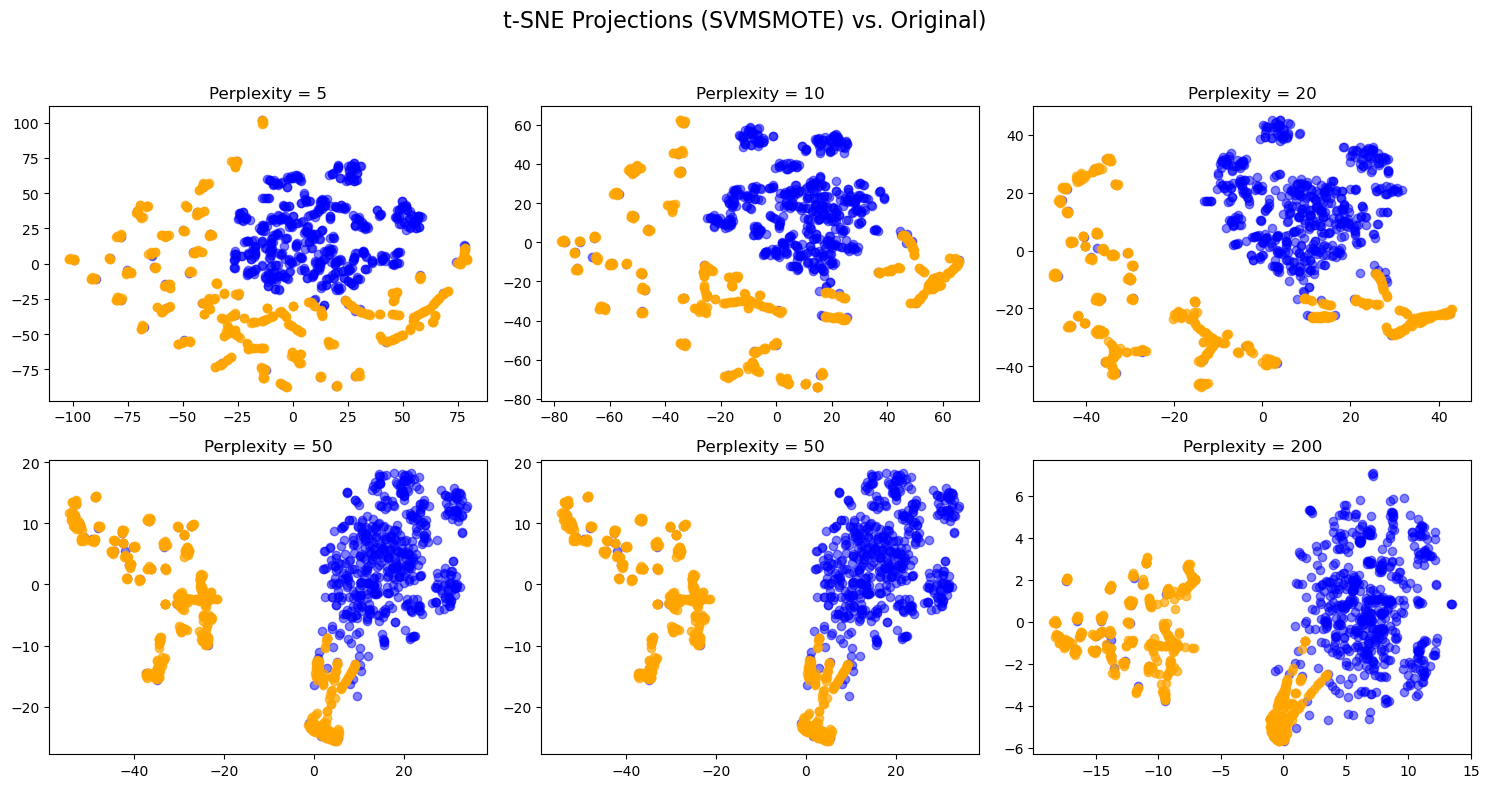

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE


X_resampled2, y_resampled2, is_synthetic2 = get_oversampling_data(
    df10_scaled,
    model=SVMSMOTE,
    sampling_strategy=0.02,
    random_state=42
)

plot_oversampling_data(X_resampled2, is_synthetic2, model_name="SVMSMOTE")

#### Comparison of SMOTE, BorderlineSMOTE, and SVMSMOTE
For each perplexity value, notice that BorderlineSMOTE and SVMSMOTE interpolate points (the yellow) more away from the central cluster of normal points (blue).

_run time_: 2m 6.6s

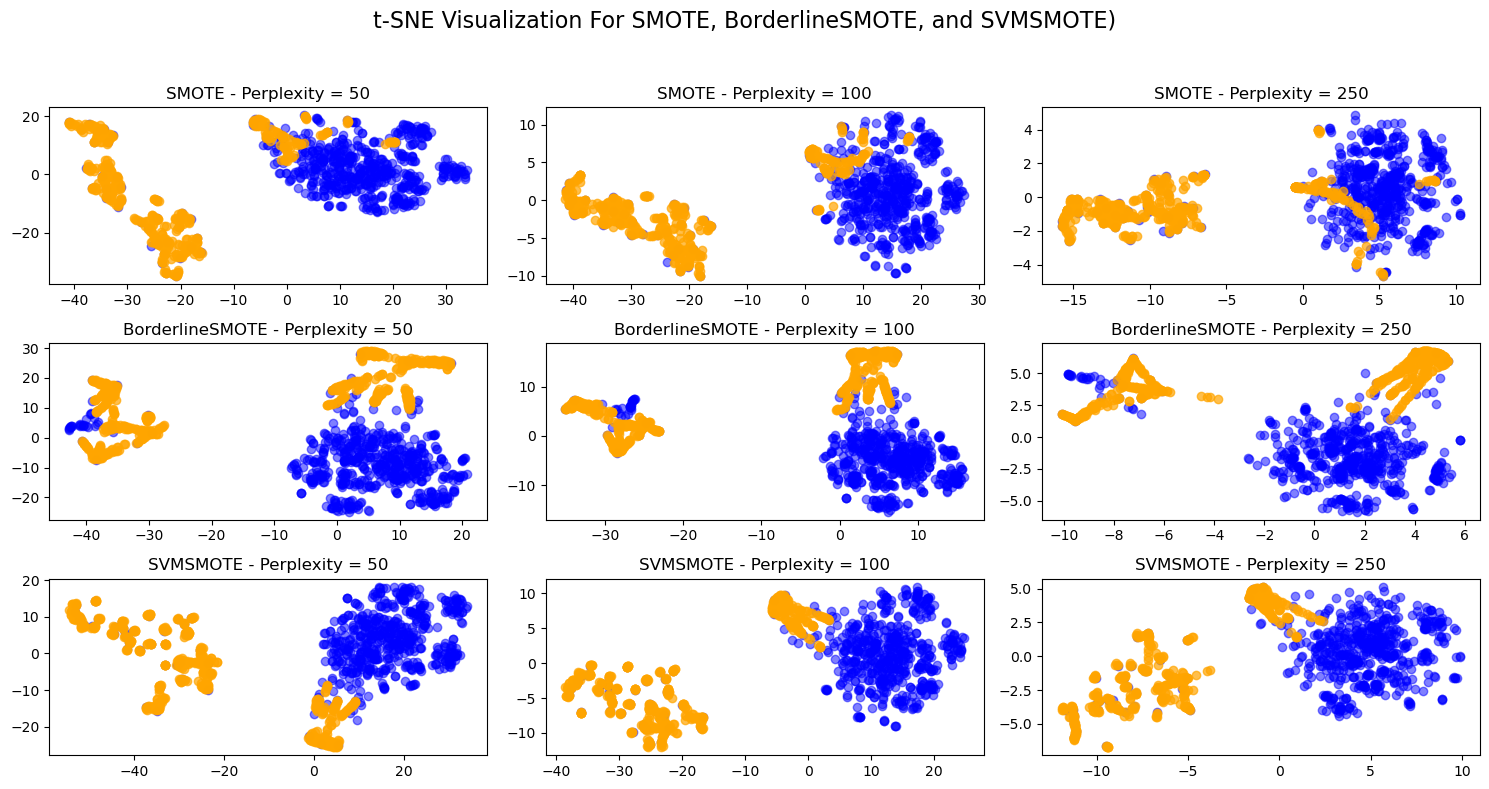

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

#######################################
# Create a grid of subplots: 3 rows × 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
axes = axes.flatten()  # Flatten to make iteration easier
perplexities = [50, 100, 250]

models = [
    SMOTE,
    BorderlineSMOTE,
    SVMSMOTE
]

for i, model in enumerate(models):
    X_resampled2, y_resampled2, is_synthetic2 = get_oversampling_data(
        df10_scaled, 
        model, 
        sampling_strategy=0.02, 
        random_state=42
    )
    for j, perplexity in enumerate(perplexities):
        ax = axes[i * 3 + j]
        X_embedded = TSNE(n_components=2, perplexity=perplexity, random_state=42).fit_transform(X_resampled2)
        
        sc = ax.scatter(X_embedded[~is_synthetic2, 0], X_embedded[~is_synthetic2, 1], c='blue', label='Original', alpha=0.5)
        sc = ax.scatter(X_embedded[is_synthetic2, 0], X_embedded[is_synthetic2, 1], c='orange', label='SMOTE-generated', alpha=0.7)

        ax.set_title(f"{model.__name__} - Perplexity = {perplexity}")

# Global layout adjustments
plt.suptitle("t-SNE Visualization For SMOTE, BorderlineSMOTE, and SVMSMOTE)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()

## Imbalance Ratio
In this section we investigate the variation of the fraud/non-fraud ratio on model training and performance. Reference this resource: https://www.kaggle.com/code/carlmcbrideellis/classification-how-imbalanced-is-imbalanced

We measure the performance of our models based on precision-recall (PR) curves. Average precision is an approximation to the area under the curve of the PR curves. We find that the variation of average precision scores across different number of features, sampling methods, models (Logistic Regression and Random Forest), and sampling ratios is minimal. This leads us to conclude that while sampling methods are a standard technique to deal with imbalanced data, they are not effective for this dataset. We explore this further in the Model Training section

_run time_: 15m 18.6s

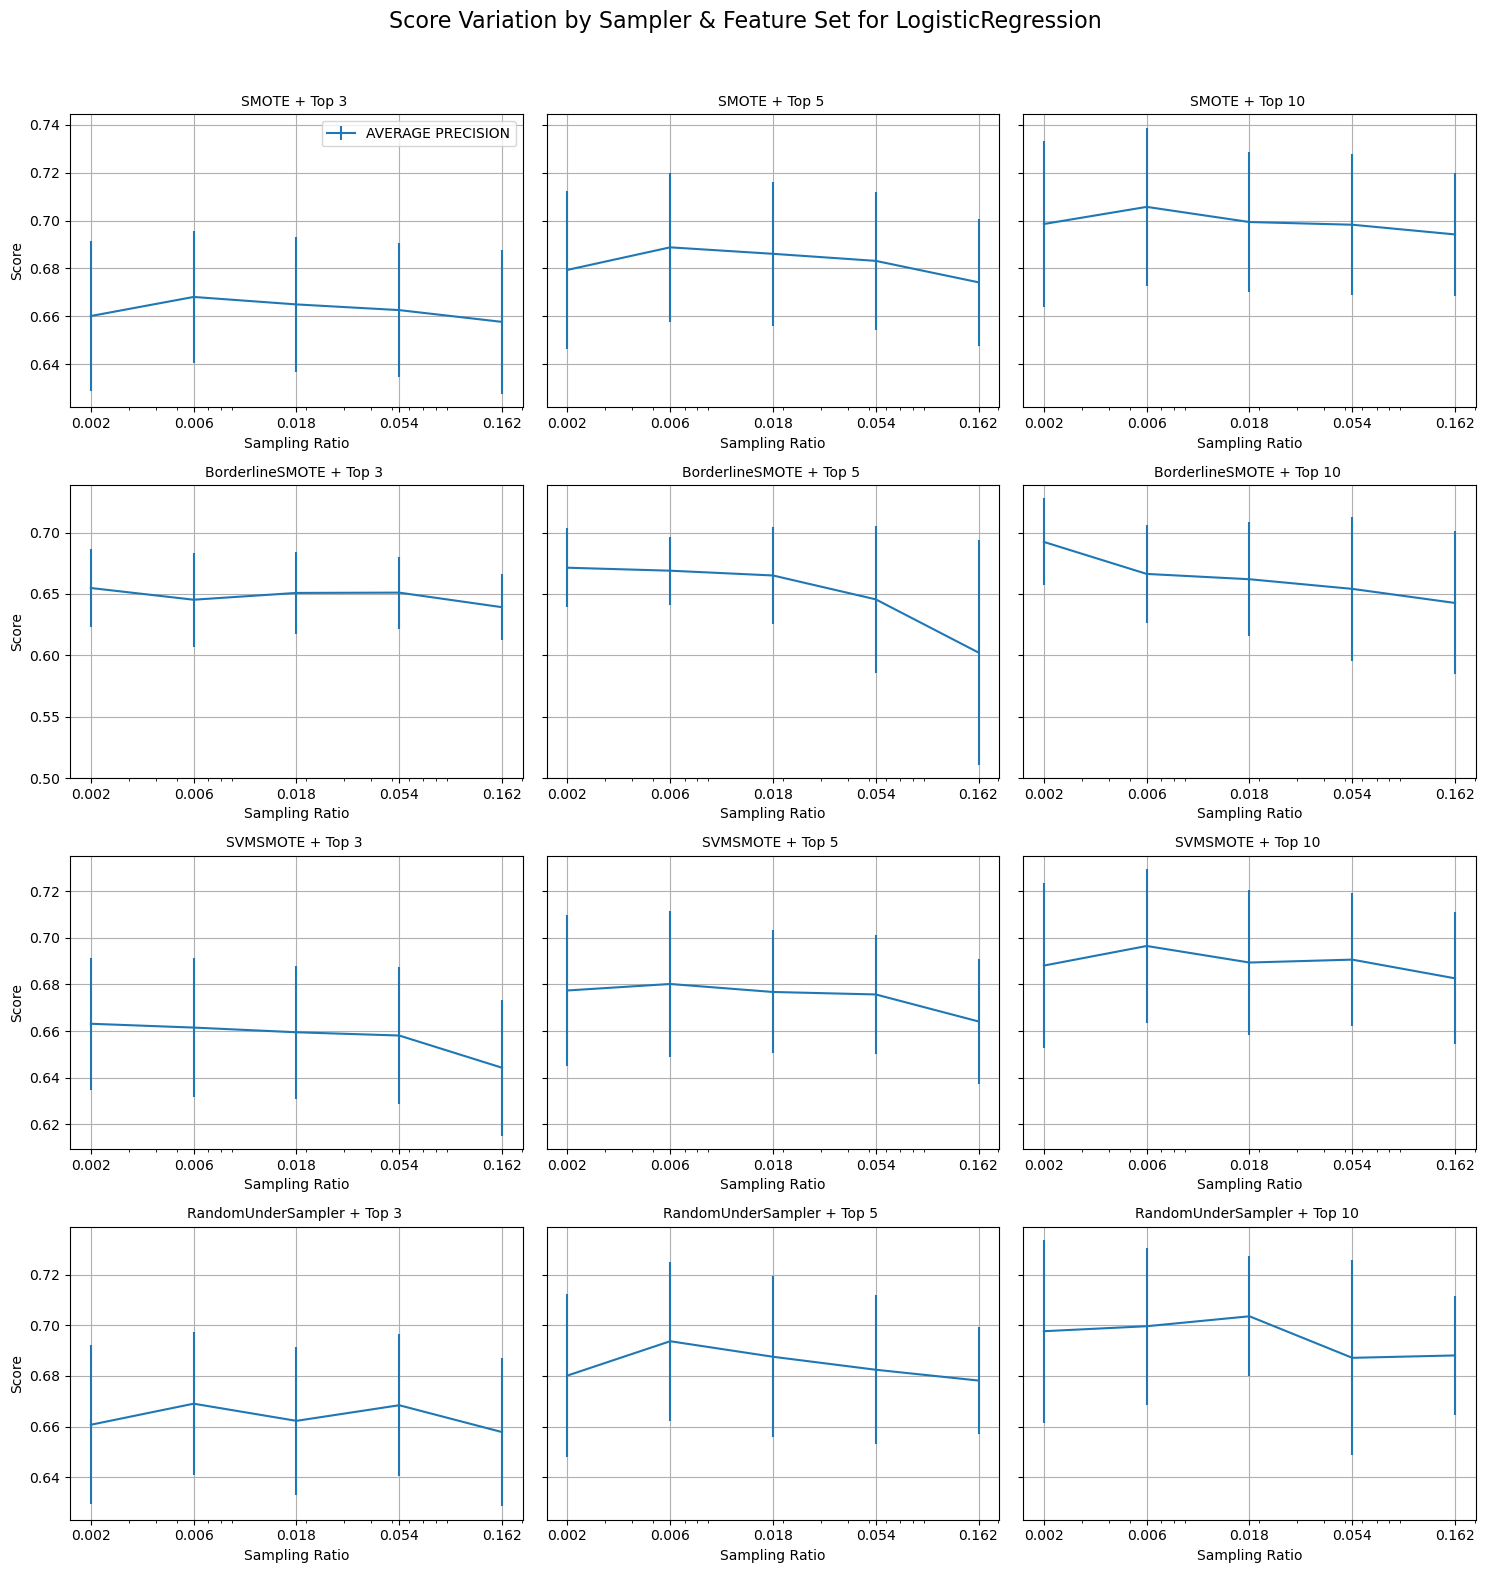

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score,
    accuracy_score, f1_score, recall_score, matthews_corrcoef
)
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

def plot_scores_grid_by_ratio(ratios, model, skf, 
                              sampler_classes, feature_sets,
                              scoring_metrics,
                              df2_scaled, target_col='Class'):

    n_rows = len(sampler_classes)
    n_cols = len(feature_sets)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharey='row')
    if n_rows == 1 or n_cols == 1:
        axes = np.array(axes).reshape(n_rows, n_cols)

    for i, (sampler_name, SamplerClass) in enumerate(sampler_classes.items()):
        for j, (feature_label, feature_cols) in enumerate(feature_sets.items()):
            ax = axes[i, j]
            X = df2_scaled[feature_cols]
            y = df2_scaled[target_col]

            metric_means = {metric: [] for metric in scoring_metrics}
            metric_stds = {metric: [] for metric in scoring_metrics}

            # If sampler is None (i.e. "No Sampling"), ignore ratios and run once
            current_ratios = [None] if SamplerClass is None else ratios

            for r in current_ratios:
                if SamplerClass is not None:
                    sampler = SamplerClass(sampling_strategy=r)
                    pipeline = Pipeline([
                        ('sampler', sampler),
                        ('model', model)
                    ])
                else:
                    pipeline = SklearnPipeline([
                        ('model', model)
                    ])

                scores = {metric: [] for metric in scoring_metrics}

                for train_idx, test_idx in skf.split(X, y):
                    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                    pipeline.fit(X_train, y_train)
                    y_pred = pipeline.predict(X_test)
                    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                    if 'roc_auc' in scoring_metrics:
                        scores['roc_auc'].append(roc_auc_score(y_test, y_pred_prob))
                    if 'average_precision' in scoring_metrics:
                        scores['average_precision'].append(average_precision_score(y_test, y_pred_prob))
                    if 'accuracy' in scoring_metrics:
                        scores['accuracy'].append(accuracy_score(y_test, y_pred))
                    if 'f1' in scoring_metrics:
                        scores['f1'].append(f1_score(y_test, y_pred))
                    if 'recall' in scoring_metrics:
                        scores['recall'].append(recall_score(y_test, y_pred))
                    if 'mcc' in scoring_metrics:
                        scores['mcc'].append(matthews_corrcoef(y_test, y_pred))
                    if 'precision' in scoring_metrics:
                        scores['precision'].append(precision_score(y_test, y_pred))


                for metric in scoring_metrics:
                    metric_means[metric].append(np.mean(scores[metric]))
                    metric_stds[metric].append(np.std(scores[metric]))

            # Plotting
            for metric in scoring_metrics:
                label = metric.replace("_", " ").upper()
                x_vals = [0] if SamplerClass is None else ratios
                ax.errorbar(x_vals, metric_means[metric], yerr=metric_stds[metric], label=label)

            title_suffix = "" if SamplerClass is not None else "(No Sampling)"
            ax.set_title(f"{sampler_name} + {feature_label} {title_suffix}", fontsize=10)
            ax.set_xlabel("Sampling Ratio" if SamplerClass is not None else "")
            if j == 0:
                ax.set_ylabel("Score")
            ax.grid(True)

            # Log scale and tick formatting
            if SamplerClass is not None:
                ax.set_xscale('log')
                ax.set_xticks(ratios)
                ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

            if i == 0 and j == 0:
                ax.legend()

    fig.suptitle(f"Score Variation by Sampler & Feature Set for {model.__class__.__name__}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

sampler_classes = {
    #"No Sampling": None,
    "SMOTE": SMOTE,
    "BorderlineSMOTE": BorderlineSMOTE,
    "SVMSMOTE": SVMSMOTE,
    #"ADASYN": ADASYN,
    "RandomUnderSampler": RandomUnderSampler,  
}

feature_sets = {
    "Top 3": ['V14', 'V17', 'V12'],
    "Top 5": ['V14', 'V17', 'V12', 'V10', 'V11'],
    "Top 10": ['V14', 'V17', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9']
}

scoring_metrics = ['average_precision']
ratios = [0.002, 0.006, 0.018, 0.054, 0.162]

plot_scores_grid_by_ratio(
    ratios=ratios,
    model=LogisticRegression(),
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    sampler_classes=sampler_classes,
    feature_sets=feature_sets,
    scoring_metrics=scoring_metrics,
    df2_scaled=df2_scaled
)


_run time_: 20m 46.9s

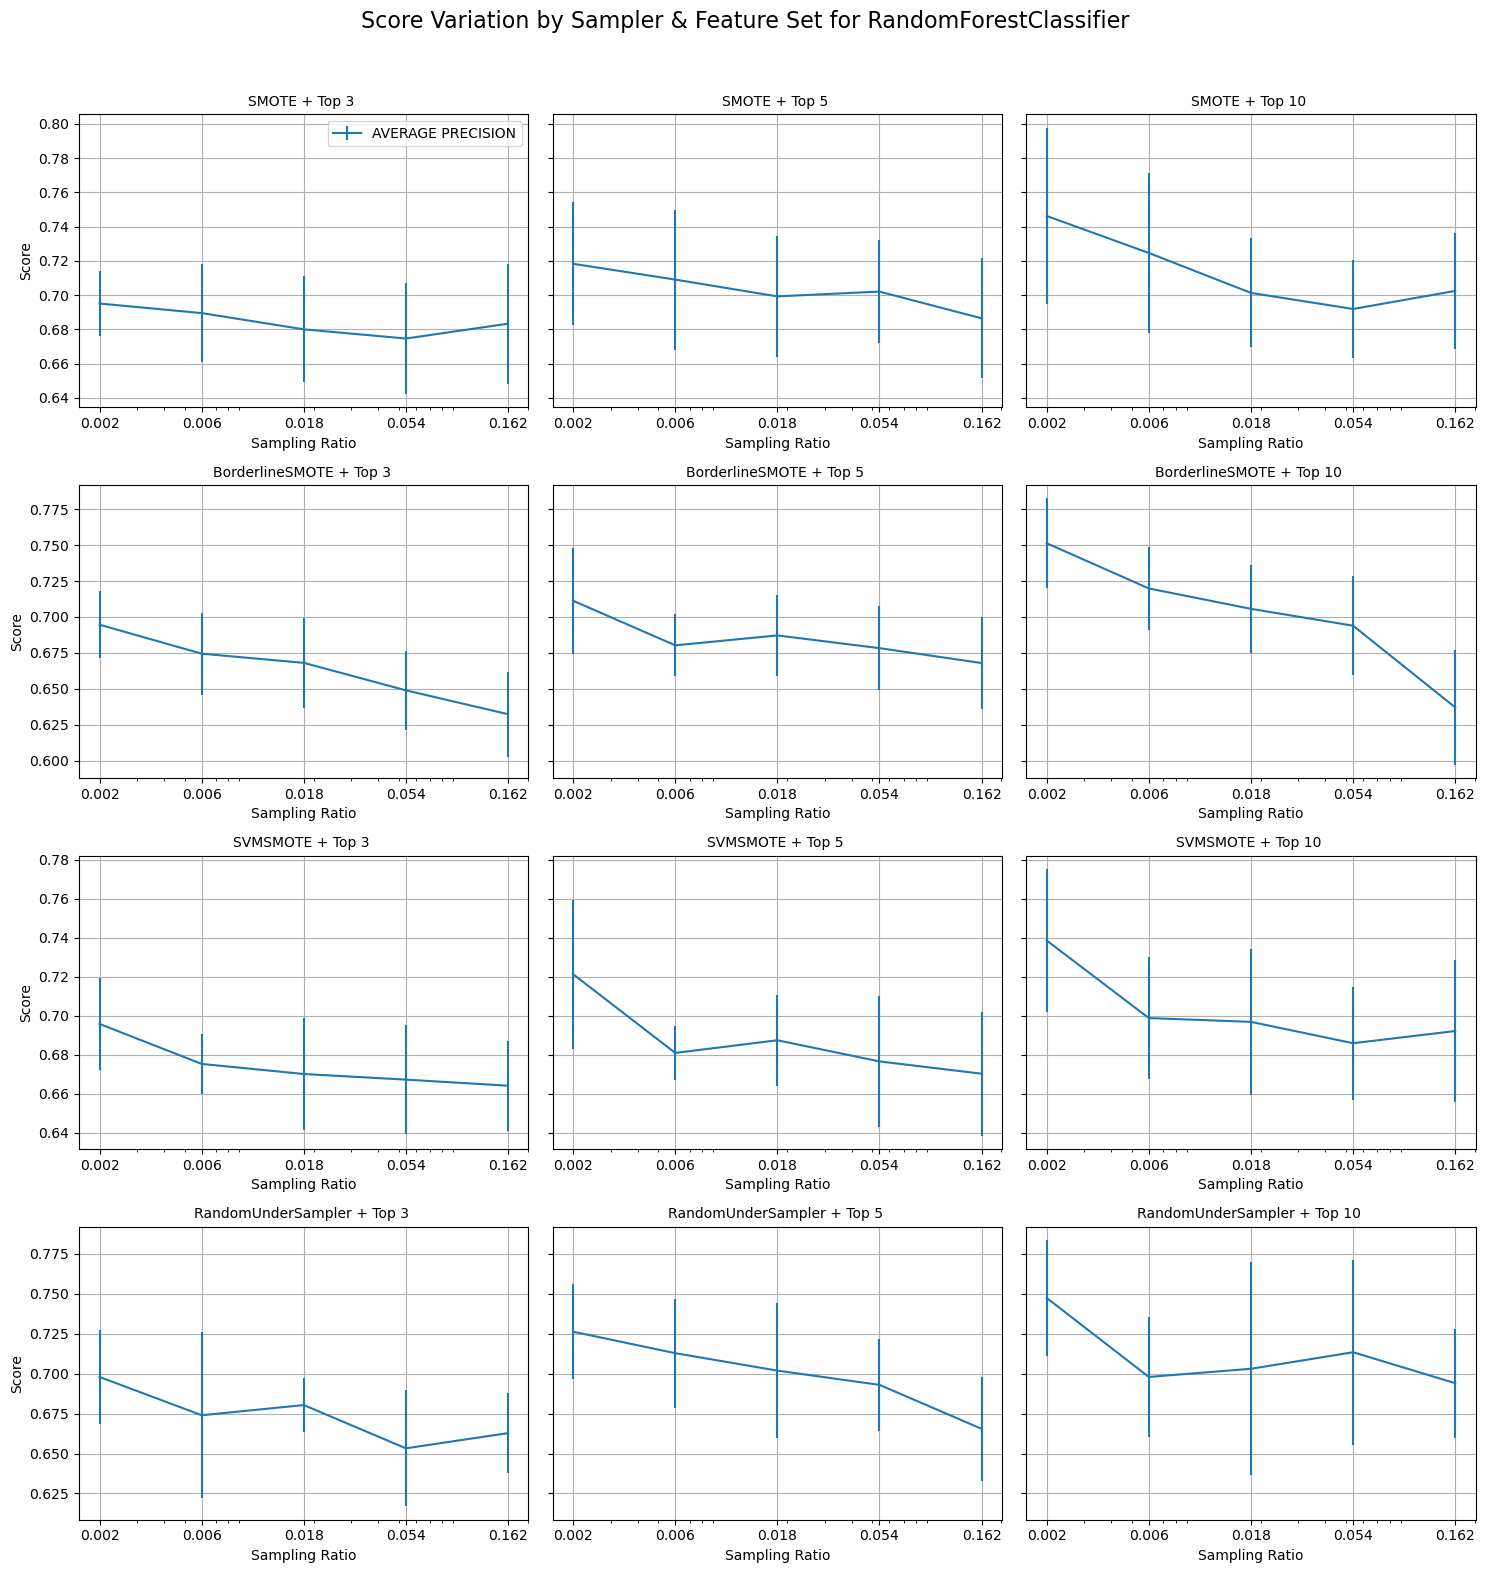

In [43]:
plot_scores_grid_by_ratio(
    ratios=ratios,
    model=RandomForestClassifier(n_estimators=15, max_depth=3, random_state=42),
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    sampler_classes=sampler_classes,
    feature_sets=feature_sets,
    scoring_metrics=scoring_metrics,
    df2_scaled=df2_scaled
)

# Validation
After exploring the data, a natural step is to consider what features or models to use; however, there are numerous models to choose from. Which models are better or what features have higher importance? To answer this, we have to think about the context of our project. What is most important in a financial fraud detection system? To that end, precision tends to be the most important. The purpose of a fraud detection system is to raise the alarm to human investigators to probe into a possibly fraudulent transaction. If it turns out the transaction is genuine (a false positive) then we have wasted valuable human labor. All things equal, we want to minimize false positives or equivalently maximize precision. The party (corporate bank, government, or whatever financial institution it may be) that is interested in the detection system would like to detect as many frauds as well; therefore, we care about recall as well. Consequently, PR curves will be the general metric to compare overall model performance. This contrasts to the generally used ROC curves in binary classification. In addition, we use learning curves to evaluate overfitting.
## ROC Curve
Just to make a point, we compare ROC curves to PR curves which reveals multiple advantages of the latter over the former. Below we see the performance between selected models is marginal and is thus hard to figure out what the best model is. Moreover, the ROC curve does not measure precision so performances can be misleading: there is potential for high auc-roc curve yet low precision.

__Run Time__: 1.6s


### Sampler: SMOTE ###

=== Model: Logistic Regression ===
Selected features: ['V17', 'V14']
Selected features: ['V17', 'V14']
Selected features: ['V17', 'V14']
Selected features: ['V17', 'V14']
Selected features: ['V17', 'V14']

=== Model: Logistic Regression ===
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Selected features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', '

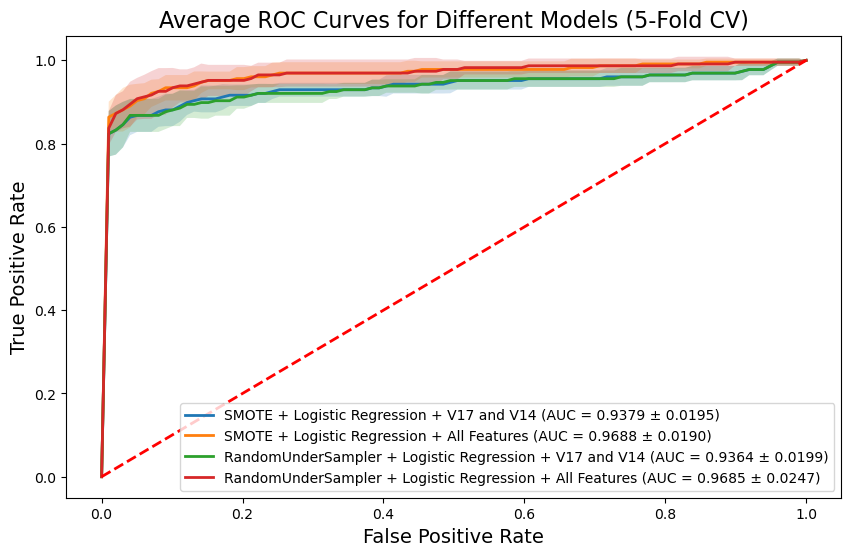

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# Features and target
X = df2_scaled.drop(columns=['Class'], axis=1)
#X = df2_scaled[['V17', 'V14']]
y = df2_scaled['Class']
feature_names = X.columns  # Store feature names for later reference
num_features = ['V17 and V14', 'All Features']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    #"RandomOverSampler": RandomOverSampler(sampling_strategy=1, random_state=42),
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    #"ADASYN": ADASYN(sampling_strategy=1, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
    # "NearMiss": NearMiss(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    #"Support Vector Machine": SVC(kernel="linear", probability=True),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for i in range(2):
        if i == 0:
            X = df2_scaled[['V17', 'V14']]
        else: 
            X = df2_scaled.drop(columns=['Class'], axis=1)
        for model_name, model in models.items():
            print(f"\n=== Model: {model_name} ===")

            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)

            # Build the pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                #('feature_selection', RFE(estimator=model, n_features_to_select=5)),
                ('model', model)
            ])

            for train_idx, test_idx in skf.split(X, y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                # Fit pipeline
                pipeline.fit(X_train, y_train)

                # Feature selection mask
                #selected_mask = pipeline.named_steps['feature_selection'].support_
                #selected_features = feature_names[selected_mask]
                selected_features = X.columns
                print("Selected features:", list(selected_features))

                # Predict probabilities
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                # ROC and AUC
                fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
                roc_auc = auc(fpr, tpr)

                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(roc_auc)

            # Calculate mean + std AUC
            mean_tpr = np.mean(tprs, axis=0)
            std_tpr = np.std(tprs, axis=0)
            mean_auc = np.mean(aucs)
            std_auc = np.std(aucs)

            # Plot
            label = f"{sampler_name} + {model_name} + {num_features[i]} (AUC = {mean_auc:.4f} ± {std_auc:.4f})"
            plt.plot(mean_fpr, mean_tpr, lw=2, label=label)
            plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'r--', lw=2)

# Labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Average ROC Curves for Different Models (5-Fold CV)', fontsize=16)
plt.legend(loc="lower right")

# Show plot
plt.show()

## Precision-Recall Curves
Precision-recall curves have two benefits. First, it is easier to compare performances between models. Second, precision is an important metric not included in roc curves. Moreover, we care about precision because we want the TP/(TP + FN) to be high. In the context of a fraud detection system, if on one hand precision is low, then fraud investigators will be waste time on false alarms. On the other hand, if precision is high, then fraud investigators will have high confidence in pursuing a fraud case. From the below PR curves, the highest scoring model was Random Forest trained on all features while using the SMOTE sampling method.

__Run Time__: 30.8s


### Sampler: SMOTE ###

=== Model: Log. Reg. ===

=== Model: Ran. For. ===

=== Model: Log. Reg. ===

=== Model: Ran. For. ===

### Sampler: USampler ###

=== Model: Log. Reg. ===

=== Model: Ran. For. ===

=== Model: Log. Reg. ===

=== Model: Ran. For. ===


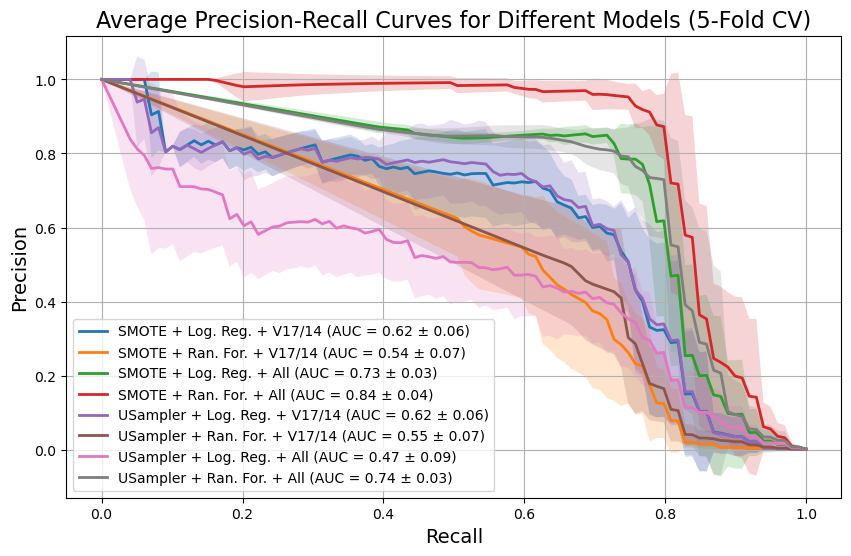

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Features and target
X = df2_scaled.drop(columns=['Class'], axis=1)
y = df2_scaled['Class']
feature_names = X.columns
num_features = ['V17/14', 'All']

# Define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define samplers to evaluate
samplers = {
    "SMOTE": SMOTE(sampling_strategy=1, random_state=42),
    "USampler": RandomUnderSampler(sampling_strategy=1, random_state=42),
}

# Define models to evaluate
models = {
    "Log. Reg.": LogisticRegression(),
    "Ran. For.": RandomForestClassifier(random_state=42)
}

# Plot setup
plt.figure(figsize=(10, 6))

# Loop through each sampler
for sampler_name, sampler in samplers.items():
    print(f"\n### Sampler: {sampler_name} ###")
    
    # Loop through each model
    for i in range(2):
        if i == 0:
            X = df2_scaled[['V17', 'V14']]
        else: 
            X = df2_scaled.drop(columns=['Class'], axis=1)

        for model_name, model in models.items():
            print(f"\n=== Model: {model_name} ===")

            precisions = []
            recalls = []
            pr_aucs = []
            mean_recall = np.linspace(0, 1, 100)

            # Build pipeline
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])

            for train_idx, test_idx in skf.split(X, y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                pipeline.fit(X_train, y_train)
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

                precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
                pr_auc = auc(recall, precision)

                # Interpolate precision to align recall
                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
                precisions.append(interp_precision)
                pr_aucs.append(pr_auc)

            # Mean and std
            mean_precision = np.mean(precisions, axis=0)
            std_precision = np.std(precisions, axis=0)
            mean_auc = np.mean(pr_aucs)
            std_auc = np.std(pr_aucs)

            label = f"{sampler_name} + {model_name} + {num_features[i]} (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
            plt.plot(mean_recall, mean_precision, lw=2, label=label)
            plt.fill_between(mean_recall, mean_precision - std_precision, mean_precision + std_precision, alpha=0.2)

# Plot formatting
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Average Precision-Recall Curves for Different Models (5-Fold CV)', fontsize=16)
# Make legend smaller
plt.legend(loc="lower left", fontsize=8)
# Add legend with custom size
plt.legend(loc="lower left")

plt.grid(True)
plt.show()


# Feature Selection
Now that we have seen the classes are fairly separable, the next step is to consider feature selection. We use a measure called Mutual Information to determine which features have the most influence on the target class. Then if we want to select k features, we select the top k features based on MI score.

## Mutual Information
https://www.kaggle.com/code/ryanholbrook/mutual-information

Mutual information (MI) score of a feature is another measure of how strongly associated a feature is with the target. We use this instead of correlation since MI scores can measure strength with non-linear relations. However, this does not account for interactions between features. Nonetheless, this can be used as a method of feature selection.

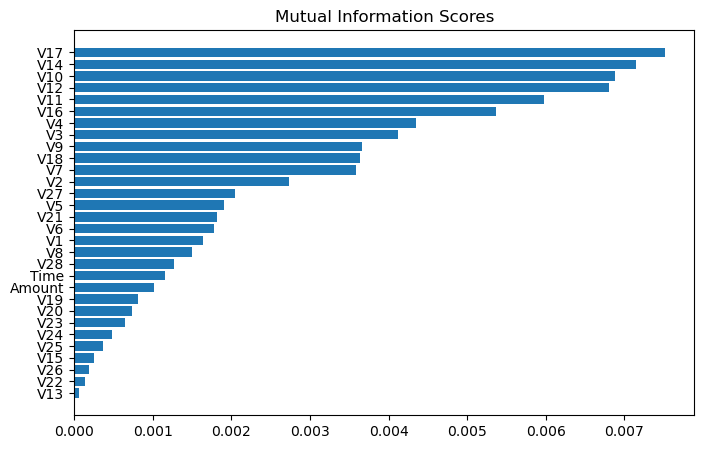

In [46]:
from sklearn.feature_selection import mutual_info_classif 

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

# Calculate MI scores
X = df2_scaled.drop(columns=['Class'])
y = df2_scaled['Class']
discrete_features = False
mi_scores = make_mi_scores(X, y, discrete_features)
# Plot MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.show()
#'V4', 'V10', 'V11', 'V12', 'V14'

### Visually compare distributions of features between fraud vs normal transactions
We have already seen the difference in distributions between fraudulent and normal transactions in the Exploratory Data Analysis section.; however, the subplots are now ordered by MI scores in descending order from left to right and from top to bottom. As one goes in descending order of MI scores, we see that the distributions of the two classes are more and more similar.

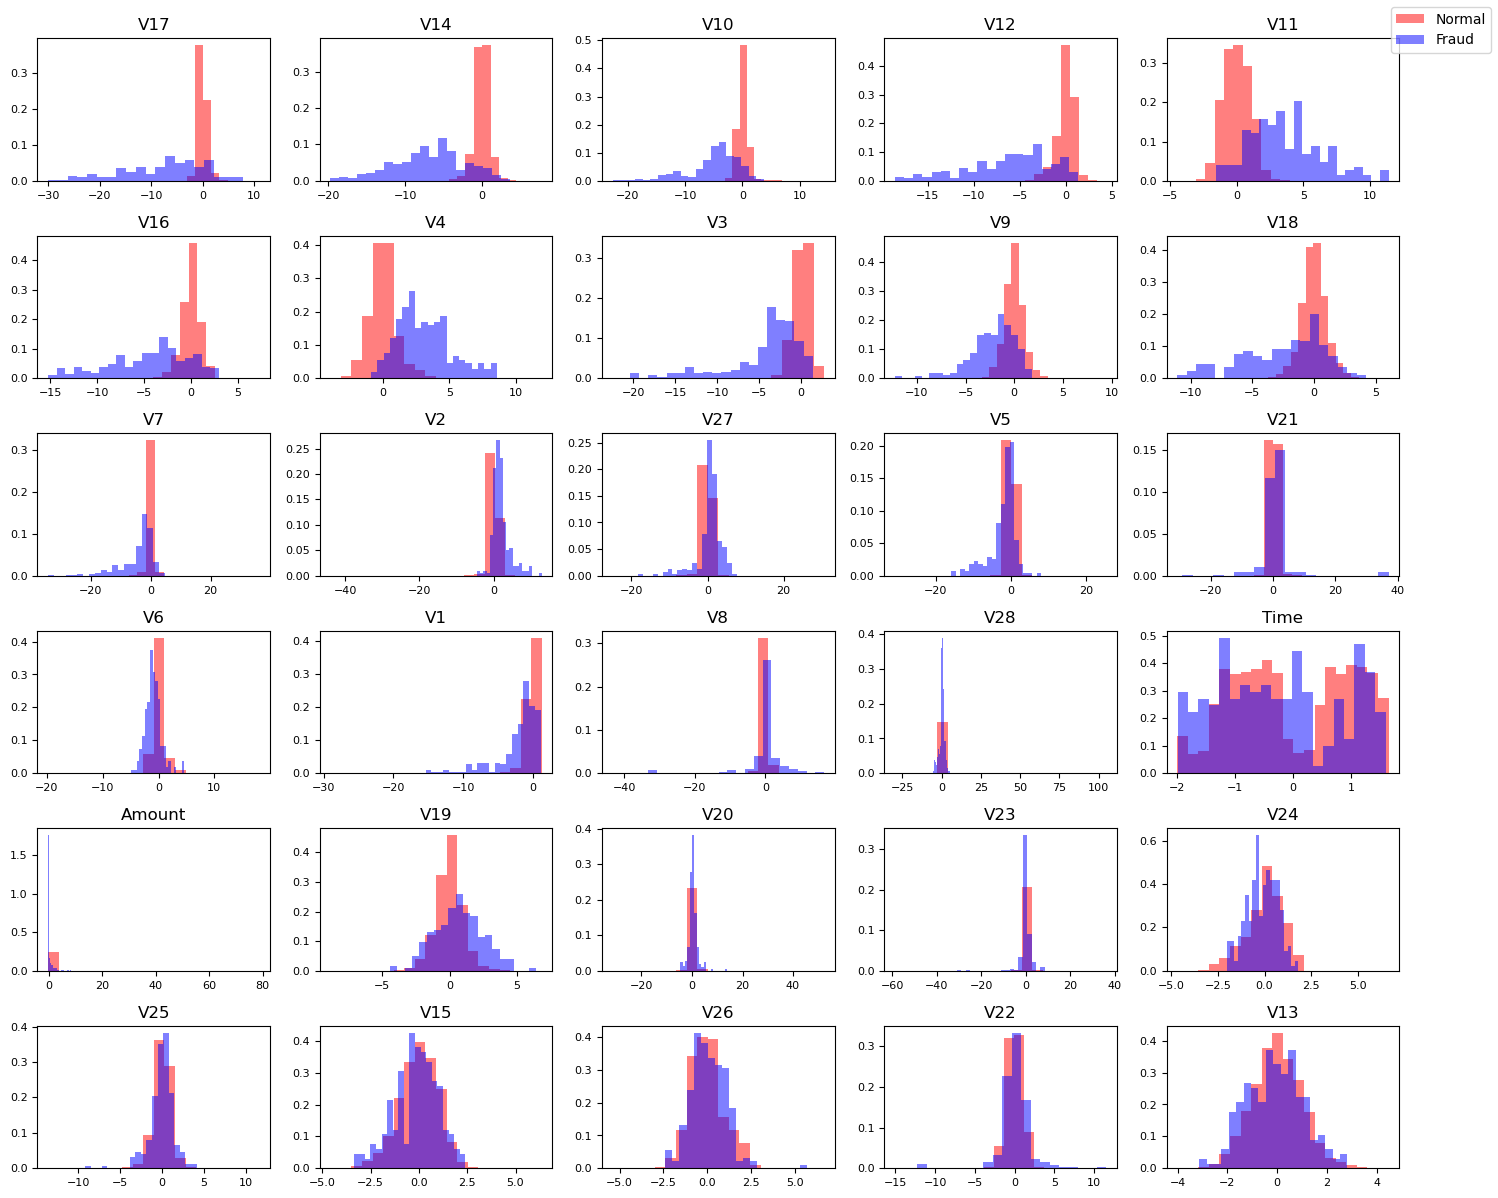

In [49]:
import matplotlib.pyplot as plt
fraud = df2_scaled[df2_scaled['Class'] == 1] 
normal = df2_scaled[df2_scaled['Class'] == 0]

# Create a figure and a grid of subplots
fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust size as needed

# Loop over the features
for i in range(6):
    for j in range(5):
        idx = 5 * i + j
        if idx >= 30:
            axes[i, j].axis('off')  # Turn off unused subplots if any
            continue
        # Plot normalized histograms for each class
        idx2 = df2.columns.get_loc(mi_scores.index[idx])
        axes[i, j].hist(normal.iloc[:, idx2], bins=20, alpha=0.5, color='red', label='Normal', density=True)
        axes[i, j].hist(fraud.iloc[:, idx2], bins=20, alpha=0.5, color='blue', label='Fraud', density=True)
        axes[i, j].set_title(df2.columns[idx2])
        axes[i, j].tick_params(labelsize=8)

# Add a single legend for the whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 0.95, 1])  # Leave space on right for legend

# Show the plot
plt.show()

# Model Training
We train models using MI score for feature selection, a sampling method, and a model (logistic regression, random forest, etc.). We then evaluate models based on auc-PR scores and check for overfitting with learning curves.

## Mutual Information
### Logistic Regression

We run various sampling methods for logistic regression with sampling ratio of 0.15. We find that sampling methods hardly influence the performance of the model.

#### LR: No Sampler PR Curve

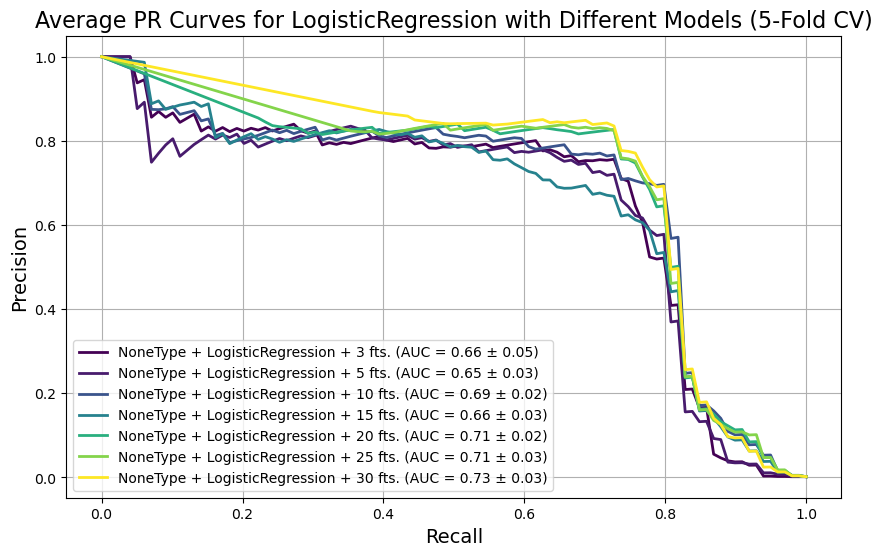

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE, SVMSMOTE

def plot_single_pr_curve(num_features, sampler, model, skf, mi_scores=mi_scores, df2_scaled=df2_scaled):
    # Features and target
    X = df2_scaled.drop(columns=['Class'], axis=1)
    y = df2_scaled['Class']

    norm = plt.Normalize(min(num_features), max(num_features))
    # rainbow
    cmap = plt.cm.viridis  # Try plasma or viridis for smoother transitions
    plt.figure(figsize=(10, 6))
    for i in num_features:
        X = df2_scaled[list(mi_scores.index[0:i])]

        precisions = []
        recalls = []
        pr_aucs = []
        mean_recall = np.linspace(0, 1, 100)

        # Build pipeline
        pipeline = None
        if sampler == None:
            pipeline = Pipeline([
                ('model', model)
            ])
        else:
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])

        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            pipeline.fit(X_train, y_train)

            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
            precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
            pr_auc = auc(recall, precision)

            # Interpolate precision to align recall
            interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
            precisions.append(interp_precision)
            pr_aucs.append(pr_auc)

        # Mean and std
        mean_precision = np.mean(precisions, axis=0)
        std_precision = np.std(precisions, axis=0)
        mean_auc = np.mean(pr_aucs)
        std_auc = np.std(pr_aucs)

        label = f"{sampler.__class__.__name__} + {model.__class__.__name__} + {i} fts. (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
        color = cmap(norm(i))
        plt.plot(mean_recall, mean_precision, lw=2, label=label, color=color)

    # Plot formatting
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title(f'Average PR Curves for {model.__class__.__name__} with Different Models (5-Fold CV)', fontsize=16)
    # Make legend smaller
    plt.legend(loc="lower left", fontsize=8)
    # Add legend with custom size
    plt.legend(loc="lower left")

    plt.grid(True)
    plt.show()

num_features = [3, 5, 10, 15, 20, 25, 30]
sampler = None #SMOTE(sampling_strategy=0.15, random_state=42)
#model = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=42)
model = LogisticRegression(class_weight='balanced')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_single_pr_curve(num_features, sampler, model, skf, mi_scores=mi_scores, df2_scaled=df2_scaled)

#### LR: No Sampler Learning Curve

Number of features: 5
Sampler: NoneType
=== LogisticRegression ===


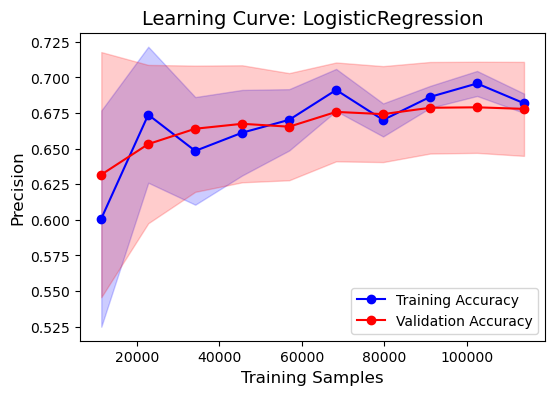

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

def plot_single_learning_curve(n_features, sampler, model, skf, mi_scores=mi_scores, df2_scaled=df2_scaled):
    X = df2_scaled[mi_scores.index[0:n_features]]
    y = df2_scaled['Class']

    print(f"Number of features: {n_features}")
    print(f"Sampler: {sampler.__class__.__name__}")
    print(f"=== {model.__class__.__name__} ===")

    # Build pipeline
    pipeline = None
    if sampler == None:
        pipeline = Pipeline([
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('sampler', sampler),
            ('model', model)
        ])

    """ 
    # Initialize pipeline with undersampling and RFE
    pipeline = Pipeline([
        ('smote', sampler),
        ('model', model)
    ])"""

    # Compute learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X, y, cv=skf, scoring='average_precision' , n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Compute mean and standard deviation of training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

    plt.xlabel("Training Samples", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.title(f"Learning Curve: {model.__class__.__name__}", fontsize=14)
    plt.legend()
    plt.show()

n_features = 5
sampler = None #SMOTE(sampling_strategy=0.15, random_state=42)
model = LogisticRegression()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_single_learning_curve(n_features, sampler, model, skf, mi_scores=mi_scores, df2_scaled=df2_scaled)

#### LR: All Samplers PR Curve
Precision-recall curves are roughly the same across number of features selected and sampling methods.

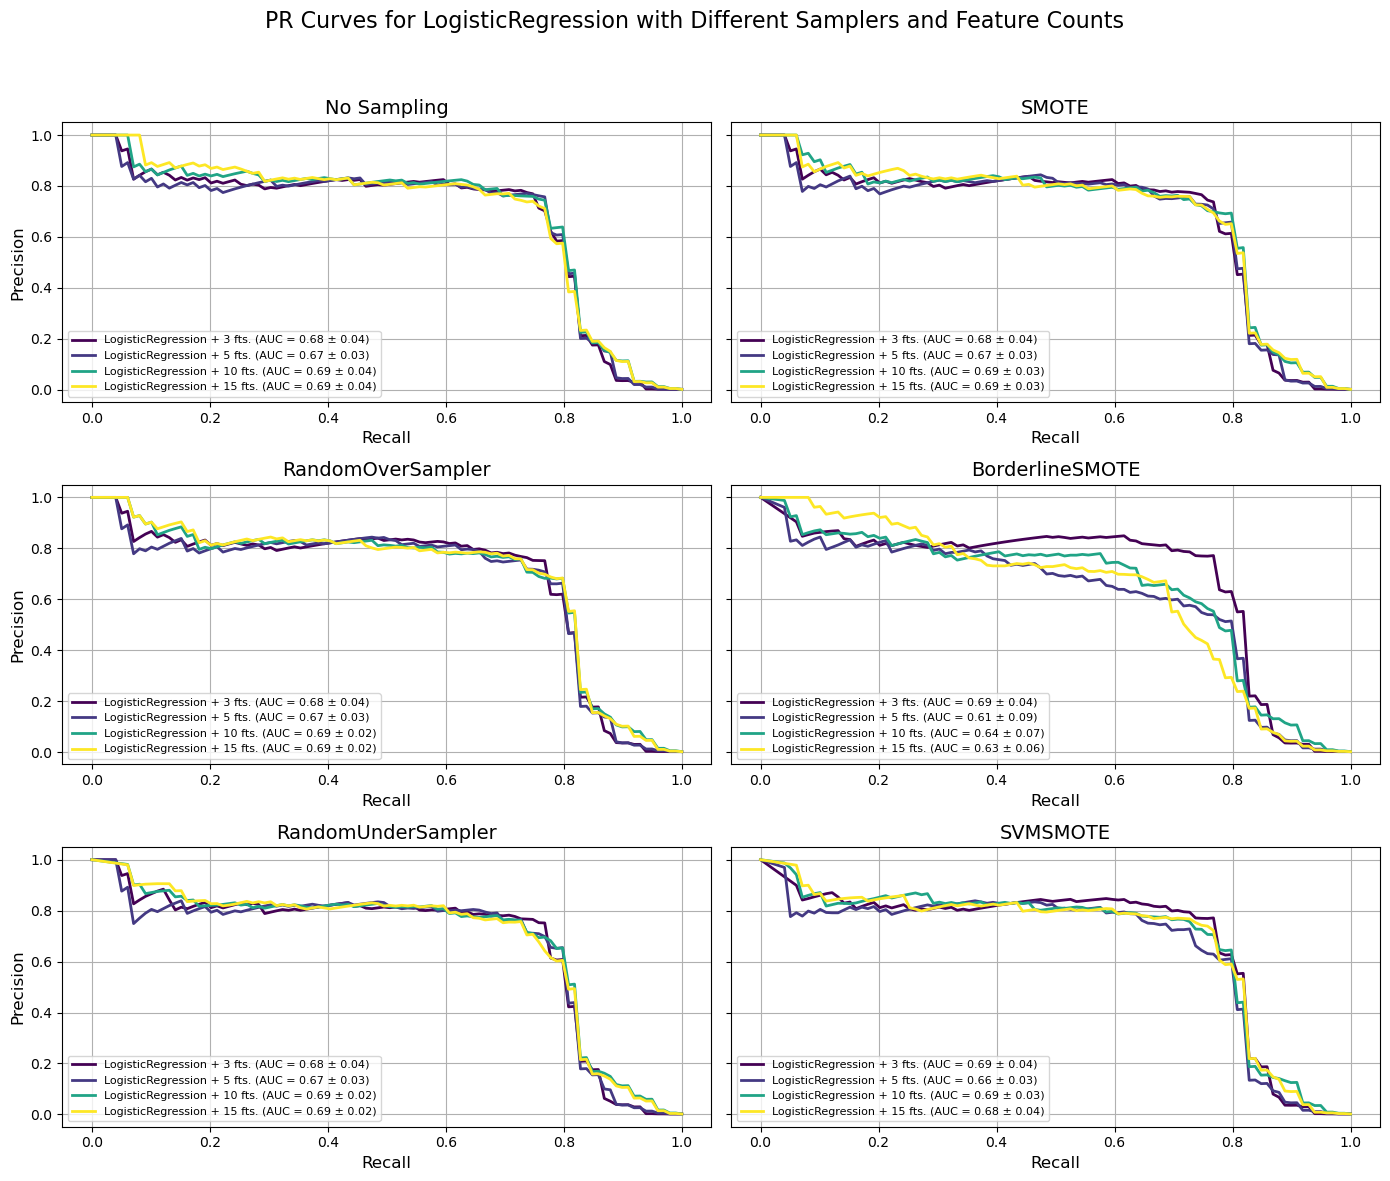

In [52]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as SklearnPipeline  # for non-sampling case
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import BorderlineSMOTE, RandomOverSampler

def plot_multi_pr_curves(num_features, samplers, model, skf, mi_scores=mi_scores, df2_scaled=df2_scaled, include_baseline=True):

    norm = plt.Normalize(min(num_features), max(num_features))
    cmap = plt.cm.viridis

    # Add baseline sampler if requested
    if include_baseline:
        samplers = {"No Sampling": None, **samplers}

    n_samplers = len(samplers)
    n_cols = 2
    n_rows = math.ceil(n_samplers / n_cols)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharey=True)
    axes = axes.flatten()

    for ax, (sampler_name, sampler) in zip(axes, samplers.items()):
        for i in num_features:
            X = df2_scaled[list(mi_scores.index[0:i])]
            y = df2_scaled['Class']

            precisions = []
            pr_aucs = []
            mean_recall = np.linspace(0, 1, 100)

            # Build pipeline with or without sampler
            if sampler is not None:
                pipeline = Pipeline([
                    ('sampler', sampler),
                    ('model', model)
                ])
            else:
                pipeline = SklearnPipeline([
                    ('model', model)
                ])

            for train_idx, test_idx in skf.split(X, y):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

                pipeline.fit(X_train, y_train)
                y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
                precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
                pr_auc = auc(recall, precision)

                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])
                precisions.append(interp_precision)
                pr_aucs.append(pr_auc)

            mean_precision = np.mean(precisions, axis=0)
            std_precision = np.std(precisions, axis=0)
            mean_auc = np.mean(pr_aucs)
            std_auc = np.std(pr_aucs)

            label = f"{model.__class__.__name__} + {i} fts. (AUC = {mean_auc:.2f} ± {std_auc:.2f})"
            color = cmap(norm(i))
            ax.plot(mean_recall, mean_precision, lw=2, label=label, color=color)

        ax.set_title(sampler_name, fontsize=14)
        ax.set_xlabel('Recall', fontsize=12)
        ax.grid(True)
        ax.legend(fontsize=8, loc='lower left')

        if ax.get_subplotspec().colspan.start == 0:
            ax.set_ylabel('Precision', fontsize=12)

    # Remove unused axes
    for i in range(n_samplers, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle(f'PR Curves for {model.__class__.__name__} with Different Samplers and Feature Counts', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define samplers (now with RandomUnderSampler)
samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.15, random_state=42),
    "RandomOverSampler": RandomOverSampler(sampling_strategy=0.15, random_state=42),
    #"ADASYN": ADASYN(sampling_strategy=0.15, random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.15, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.15, random_state=42),
    "SVMSMOTE": SVMSMOTE(sampling_strategy=0.15, random_state=42)
    #"Tomek": TomekLinks(),
    #"ClusterCentroids": ClusterCentroids(random_state=42),
    #"SMOTETomek": SMOTETomek(),
    #"EditedNearestNeighbors": EditedNearestNeighbours(),
    #"NearMiss": NearMiss(),
}

# Model
model = LogisticRegression(penalty='l2')

num_features = [3, 5, 10, 15]

plot_multi_pr_curves(num_features, samplers, model, skf, mi_scores=mi_scores, df2_scaled=df2_scaled, include_baseline=True)

#### LR: All Samplers Learning Curve
There is minimal overfitting across sampling methods.

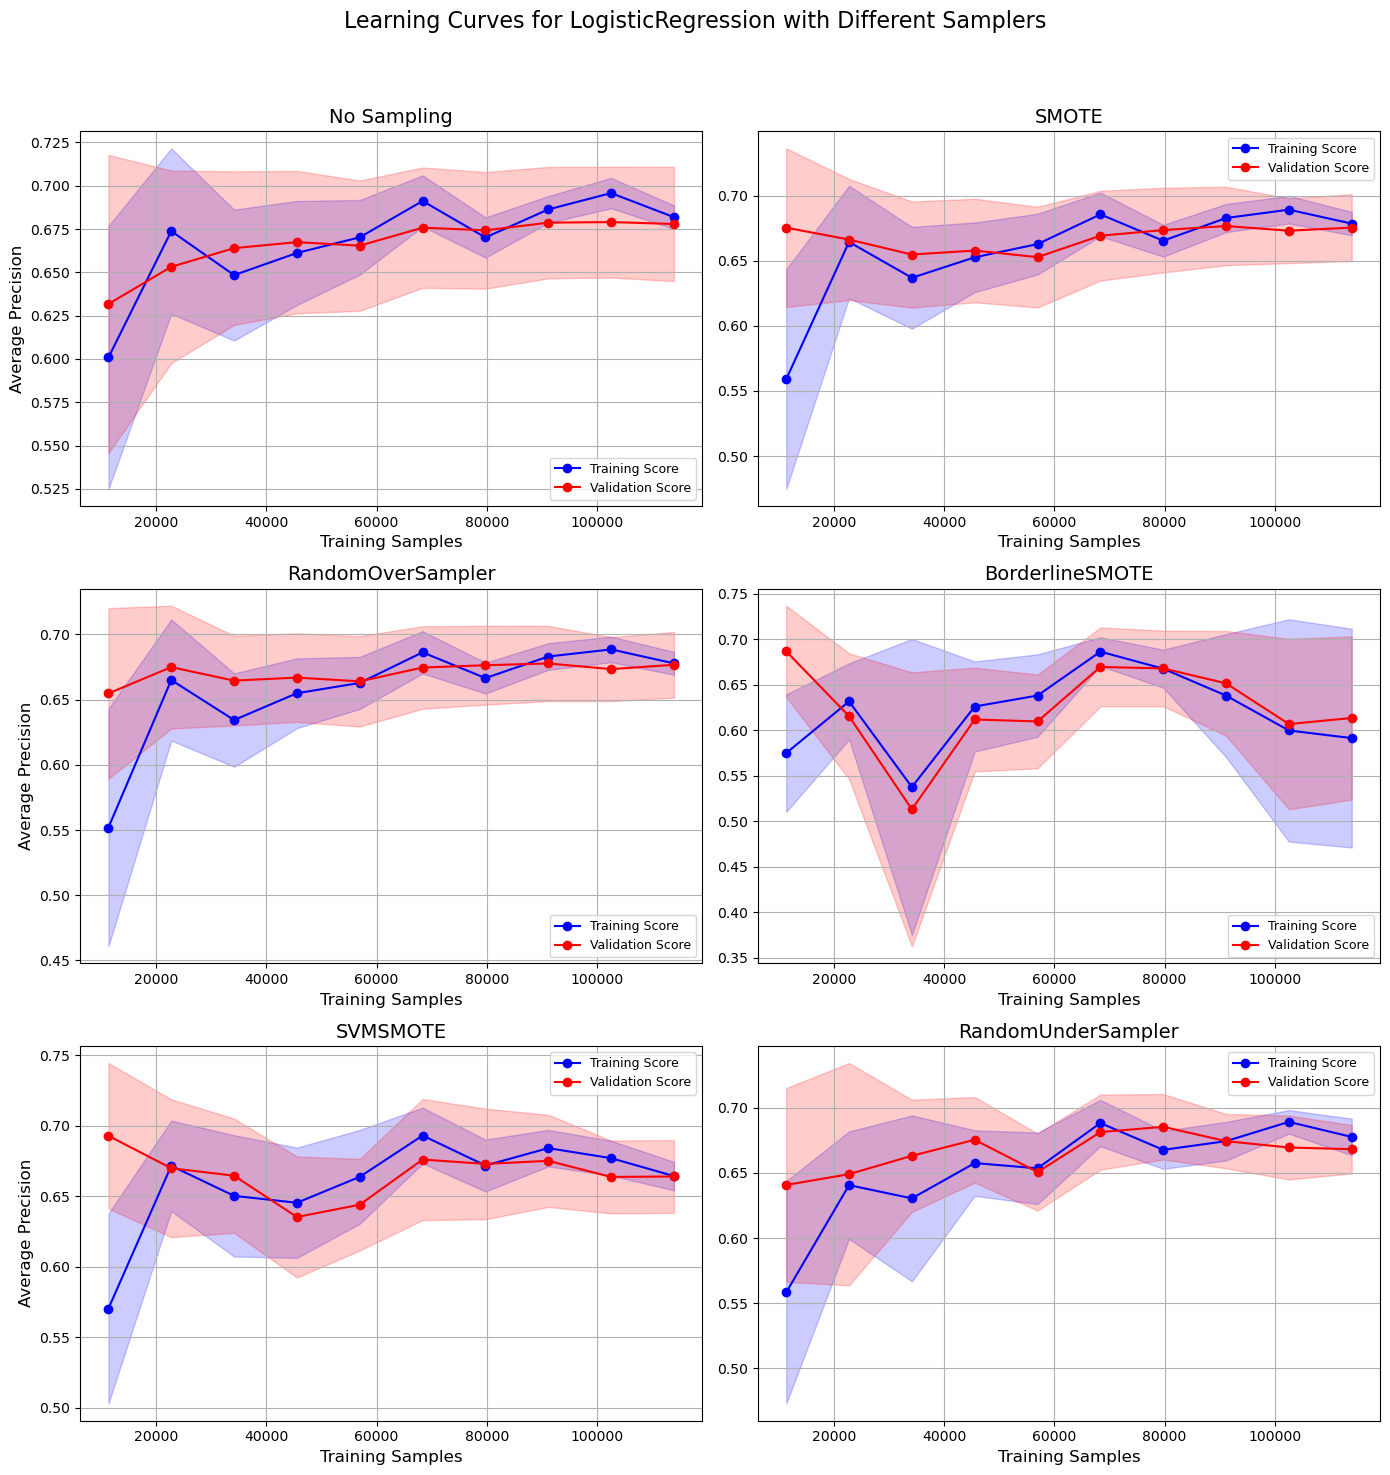

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as SklearnPipeline  # Add this if not already imported
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def plot_multi_learning_curves(num_features, samplers, model, skf, include_baseline=True):
    X = df2_scaled[mi_scores.index[0:num_features]]
    y = df2_scaled['Class']

    if include_baseline:
        samplers = {"No Sampling": None, **samplers}

    n_samplers = len(samplers)
    n_cols = 2
    n_rows = math.ceil(n_samplers / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()

    for idx, (sampler_name, sampler) in enumerate(samplers.items()):
        ax = axes[idx]

        if sampler is not None:
            pipeline = Pipeline([
                ('sampler', sampler),
                ('model', model)
            ])
        else:
            pipeline = SklearnPipeline([
                ('model', model)
            ])

        train_sizes, train_scores, val_scores = learning_curve(
            pipeline, X, y, cv=skf, scoring='average_precision',
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

        ax.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
        ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

        ax.set_title(sampler_name, fontsize=14)
        ax.set_xlabel("Training Samples", fontsize=12)
        if idx % 2 == 0:
            ax.set_ylabel("Average Precision", fontsize=12)
        ax.grid(True)
        ax.legend(fontsize=9)

    # Turn off unused axes (if any)
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Learning Curves for {model.__class__.__name__} with Different Samplers', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Num features
num_features = 5

# 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Samplers
samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.15, random_state=42),
    "RandomOverSampler": RandomOverSampler(sampling_strategy=0.15, random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.15, random_state=42),
    "SVMSMOTE": SVMSMOTE(sampling_strategy=0.15, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.15, random_state=42)
}

# Model
model = LogisticRegression()

plot_multi_learning_curves(num_features, samplers, model, skf)

### Random Forest
We compare performance of Random Forest across different sampling methods. Once again, we find that sampling methods have minimal influence on the performance of our model.

#### RF: All Samplers PR Curve
We find the performance across different number of features and sampling methods to be the same.

_Run Time_: 61m 31.8s

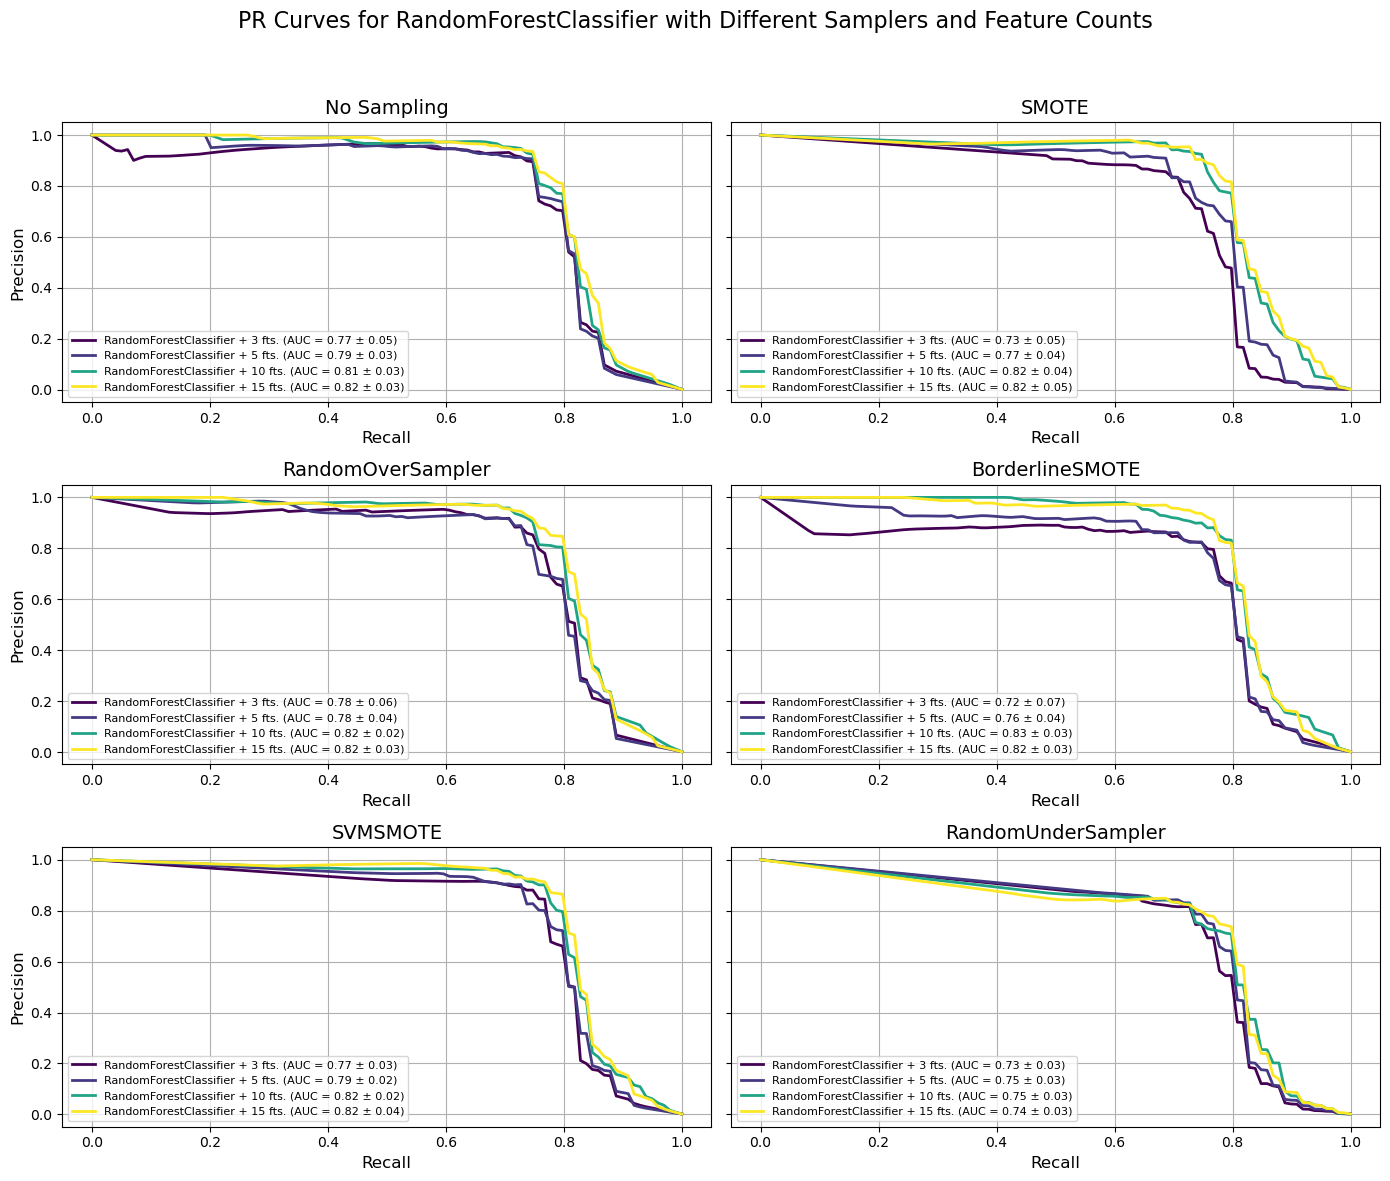

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

# 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define samplers (now with RandomUnderSampler)
samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.15, random_state=42),
    "RandomOverSampler": RandomOverSampler(sampling_strategy=0.15, random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.15, random_state=42),
    "SVMSMOTE": SVMSMOTE(sampling_strategy=0.15, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.15, random_state=42)
}

model = RandomForestClassifier(random_state=42)

num_features = [3, 5, 10, 15]

plot_multi_pr_curves(num_features, samplers, model, skf)

#### RF: All Samplers Learning Curve
Notice that RF models with oversampling has a perfect training score but significantly lower validation score. As a result, RF with oversampling is overfitting. This contrasts to RF with undersampling which has a training score closer to the validation score. Later on we try different parameters for the RF model to correct for this overfitting.

_run time_: 27m 19s

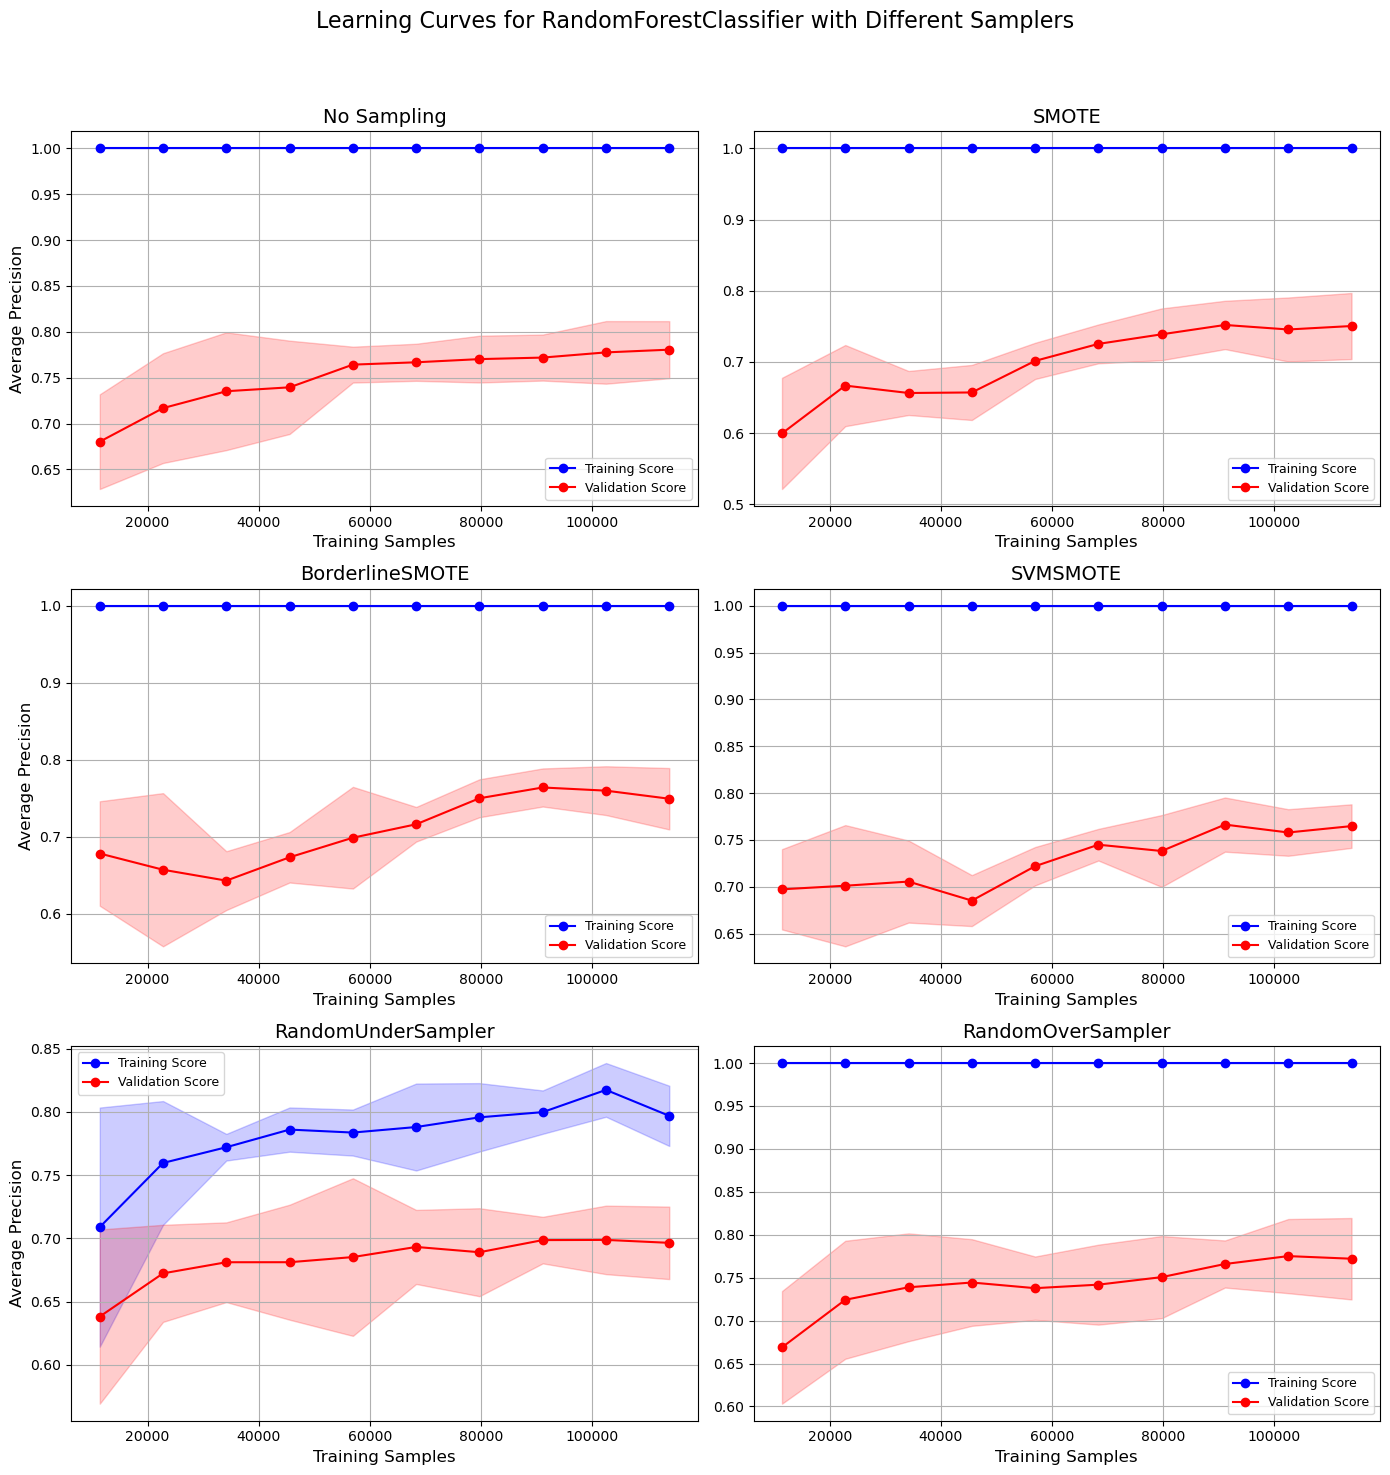

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

num_features = 5
# 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Samplers
samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.15, random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.15, random_state=42),
    "SVMSMOTE": SVMSMOTE(sampling_strategy=0.15, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.15, random_state=42),
    "RandomOverSampler": RandomOverSampler(sampling_strategy=0.15, random_state=42)
}

# Model
model = RandomForestClassifier(random_state=42)

plot_multi_learning_curves(num_features, samplers, model, skf)


#### Explore Random Forest Overfitting
In the previous section, our random forest model was overfitting. In this section we try to find out why.

##### Simplest Random Forest Classifier
###### No Sampler Learning Curve
To combat overfitting, we can reduce the number of estimators and max depth of our random forest model. With some guesswork we choose n_estimators=15 with max_depth=2 we get a better learning curve across sampling methods. We see overfitting is minimal (training score - validation score ~ 0.05)

Number of features: 5
Sampler: NoneType
=== RandomForestClassifier ===


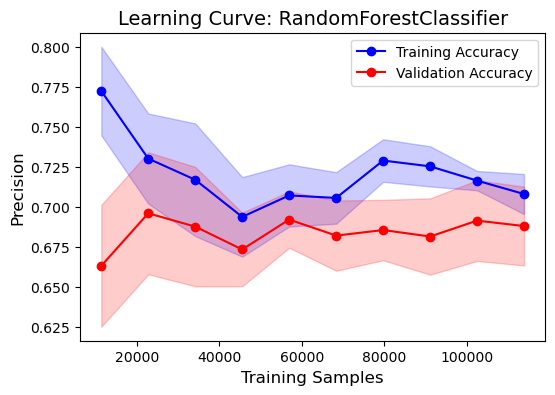

In [56]:
num_features = 5
sampler = None

# use 30, 3
# 20, 2 better
model = RandomForestClassifier(n_estimators=15, max_depth=2, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_single_learning_curve(num_features, sampler, model, skf)

###### Samplers Learning Curves
There is minimal overfitting

_run time_: 2m 56s

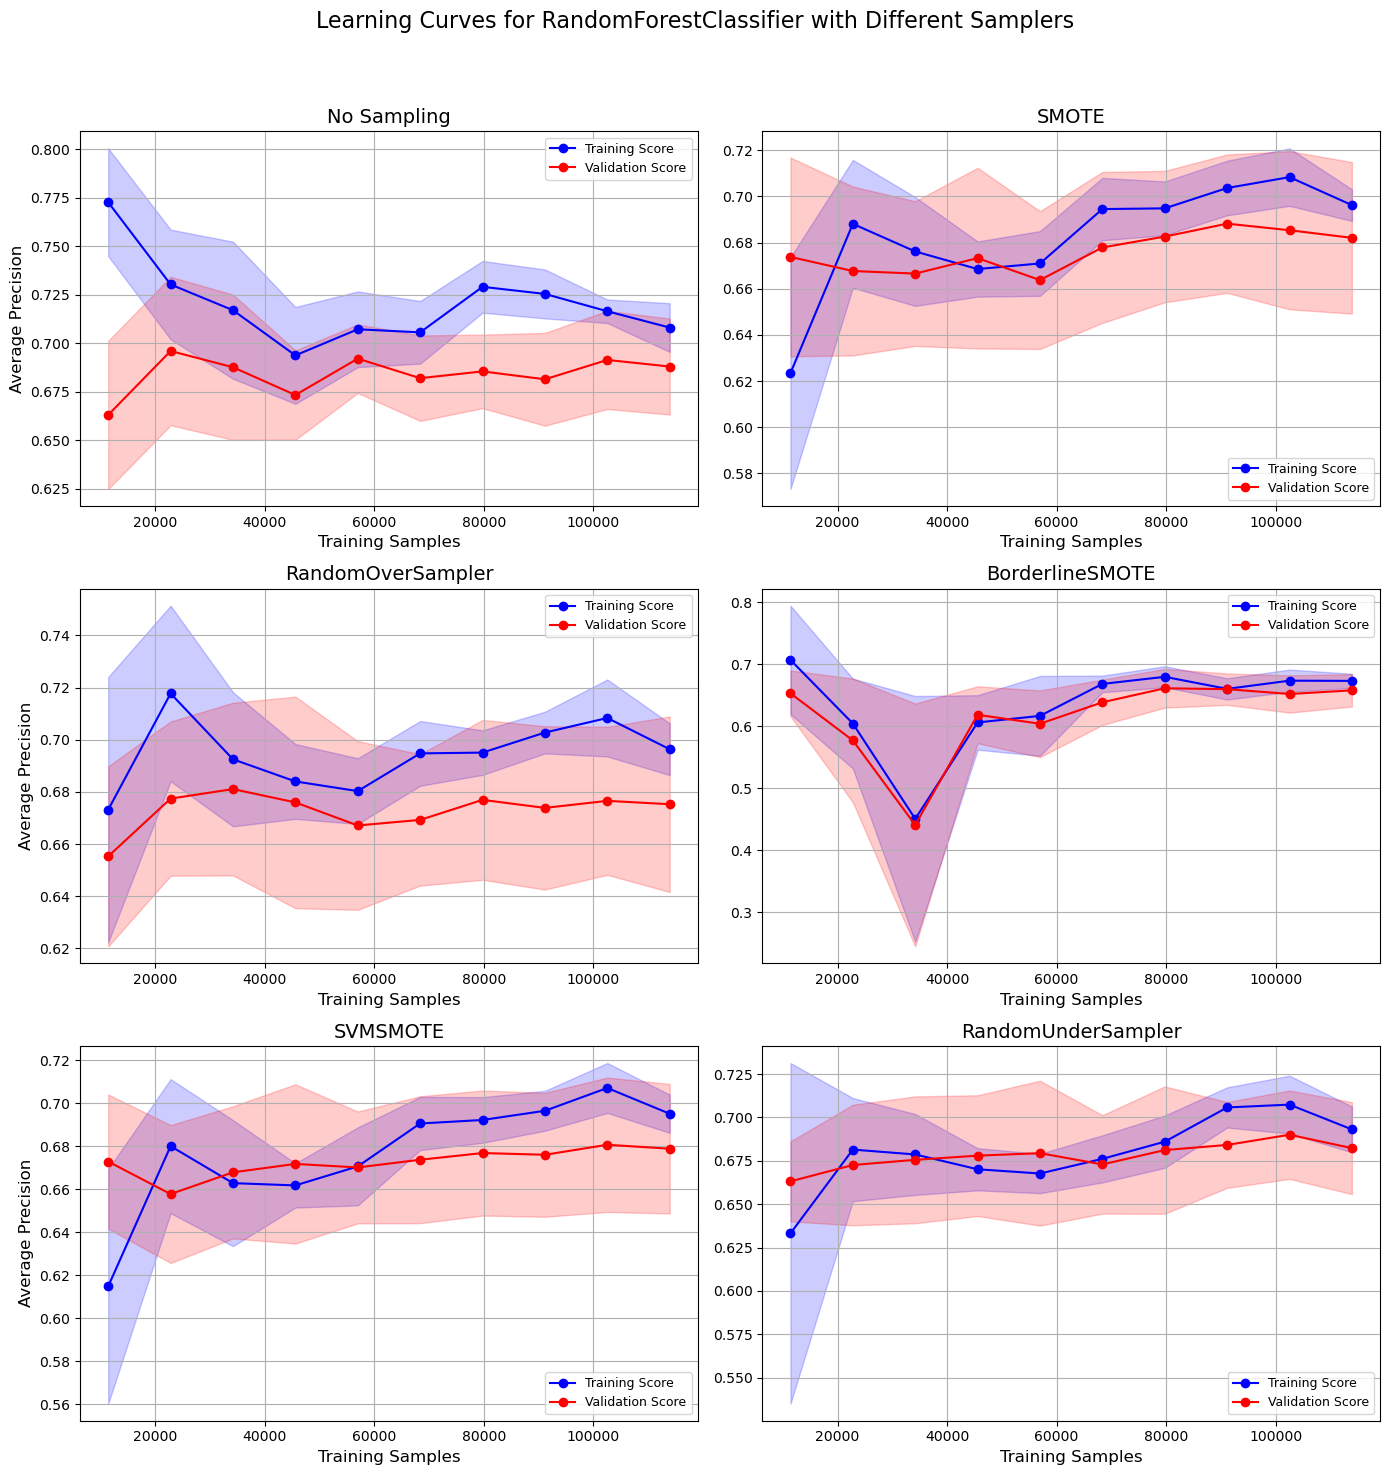

In [57]:
num_features = 5
samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.15, random_state=42),
    "RandomOverSampler": RandomOverSampler(sampling_strategy=0.15, random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.15, random_state=42),
    "SVMSMOTE": SVMSMOTE(sampling_strategy=0.15, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.15, random_state=42)
}

# use 30, 3
# 20, 2 better
model = RandomForestClassifier(n_estimators=15, max_depth=2, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_multi_learning_curves(num_features, samplers, model, skf)

###### PR Curves 
Below we plot the PR curves for the Simplest Random Forest Classifier. Performance is similar to Logistic Regression. Once again, the performance is not boosted by sampling methods.

_run time_: 4m 52.9s

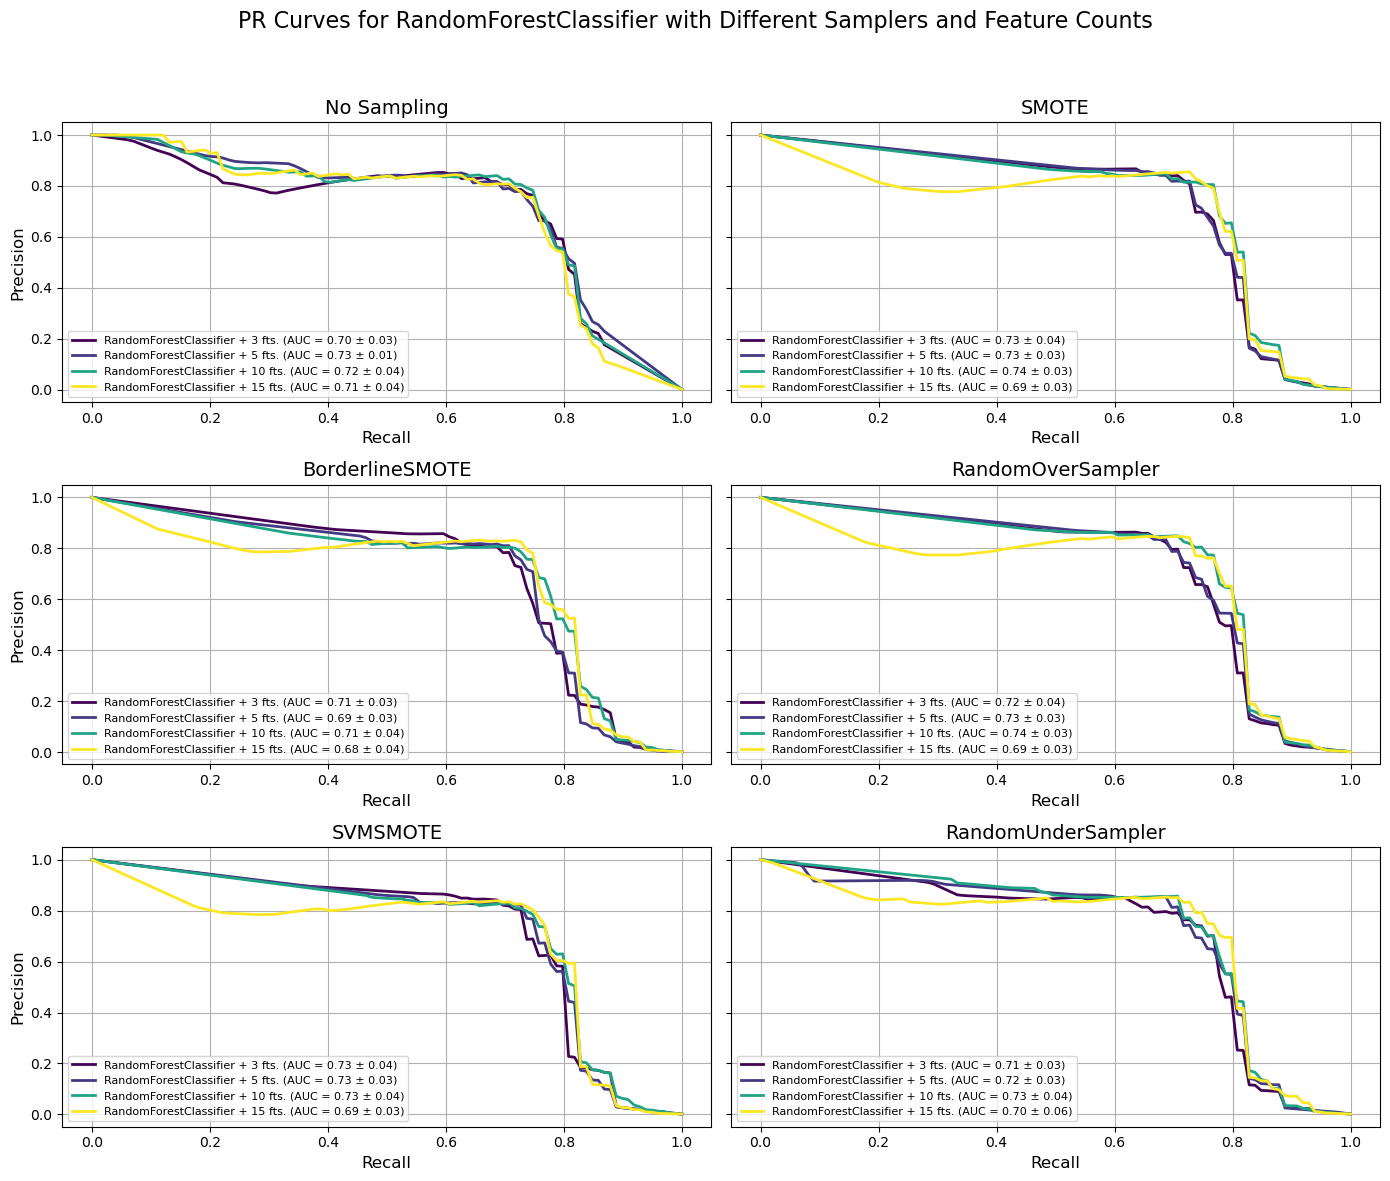

In [58]:
num_features = [3, 5, 10, 15]
samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.15, random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.15, random_state=42),
    "RandomOverSampler": RandomOverSampler(sampling_strategy=0.15, random_state=42),
    "SVMSMOTE": SVMSMOTE(sampling_strategy=0.15, random_state=42),
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.15, random_state=42)
}

model = RandomForestClassifier(n_estimators=15, max_depth=2, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plot_multi_pr_curves(num_features, samplers, model, skf)

##### GridSearchCV 
###### Optimal Parameters

Below we attempt to find better parameters using GridSearchCV for the Random Forest classifier but keep max_depth=2 and estimators=15 to prevent overfitting. We look over min_samples_split, min_samples_leaf, and max_features. We find the optimal values for these parameters are the default values so we don't further pursue parameter tuning.

_run time_: 25s

In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

# Select features and target
X = df2_scaled[mi_scores.index[:5]]
y = df2_scaled['Class']

# Define your samplers
samplers = {
    "SMOTE": SMOTE(sampling_strategy=0.15, random_state=42),
    #"BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.15, random_state=42),
    #"SVMSMOTE": SVMSMOTE(sampling_strategy=0.15, random_state=42),
    #"RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.15, random_state=42)
}

# Define RF parameter grid
param_grid = {
    'model__n_estimators': [15],
    'model__max_depth': [2], #[5, 10, None]
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2, 5],
    'model__max_features': ['sqrt', 'log2', 0.5],
    'model__class_weight': ['balanced']
}

# Stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through samplers
for sampler_name, sampler in samplers.items():
    print(f"\n🔄 Tuning model with sampler: {sampler_name}")

    # Create pipeline
    pipeline = Pipeline([
        ('sampler', sampler),
        ('model', RandomForestClassifier(random_state=42))
    ])

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='average_precision',
        n_jobs=-1,
        cv=skf,
        verbose=2
    )

    grid_search.fit(X, y)

    # Best results
    print(f"Best AP Score ({sampler_name}): {grid_search.best_score_:.4f}")
    print("Best Parameters:")
    for k, v in grid_search.best_params_.items():
        print(f"   {k}: {v}")


🔄 Tuning model with sampler: SMOTE
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__class_weight=balanced, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=15; total time=   2.3s
[CV] END model__class_weight=balanced, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=15; total time=   2.3s
[CV] END model__class_weight=balanced, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=15; total time=   2.3s
[CV] END model__class_weight=balanced, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=15; total time=   2.3s
[CV] END model__class_weight=balanced, model__max_depth=2, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=15; total t

# Conclusion
After thoroughly examining different number of features, sampling methods, and models such as Logistic Regression and Random Forest, we find that the sampling ratio and sampling method do not boost model performance. We believe this may be caused by the complicated high dimension structure of the data. While sampling methods are a standard technique to deal with imbalanced data, we found that it was not useful for this dataset.